-------------------------------------

<div style="width:100%;text-align: center;">
    <img src="ensae.png" /> <br>
    Ecole nationale de la Statistique et de l'Analyse économique Pierre NDIAYE<br>ENSAE - Dakar
    <br>
    <br>
    ***************
    <br>
    <br>
    <strong>Projet de Machine Learning 2</strong>
    <br>
    <br>
    ***************
    <br>
</div>

<div style="width:100%;text-align: center;">
    <img src="logo.png" style="width:35%;height:100%;" /> <br>
    <span style="font-size:20px;"><strong>Scoring Credit<br>DashBoard with Stearlit</strong></span>
</div>
    <br>
    <br>
<div style="display:flex;">
<div style="width:50%;text-align: left;">
   <span style="font-size:20px;">
       <strong>Présenté par </strong>: <br>
           Ulrich DABIRE <br>
           Moussa FALL <br>
           Mansour Kama SANE <br>
           Sié Charles SOU
           
           
    </span>
</div>

<div style="width:50%;text-align: right;">
   <span style="font-size:20px;">
       <strong>Sous l'encadrement de</strong> : <br>
           Mously DIAW
    </span>
</div>
</div>

<div style="width:100%;text-align: center;">
<strong>Juin 2023</strong>
    </div>

---------------------------------------------

<p style="text-align:justify;">L'activité bancaire est un secteur capital du tissu économique au regard de son apport aussi bien pour les individus que les entreprises. Ce secteur constitue un levier de dévélopement dans la mésure où une bonne gestioin du risque bancaire permet de plus grands octrois de crédit et de plus grands investissements d'où une amélioration des conditions de vies. Mais  bien souvent  confronté à la difficulté de cerner la solvabilité des emprunteurs, plusieurs banques retrécissent leurs octroient de crédits.<br  >
    Notre projet de scoring de crédit s'inscrit dans le cadre de la proposition de solution pour palier à ce problème. Le projet vise à développer une solution pour évaluer de façon précise le risque de crédit des individus et des entreprises, afin de faciliter une prise de décision financière éclairée et responsable.</p>

# Description 

    Secteur capital du tissus économique, l'activité bancaire est génératrice de
    
    est un pan capital du tissus économique d'un pays. 
    L'octroie de crédit est une phase très importante de l'activité bancaire. La mise en place de 
    
    Un levier de dévéloppement dans ce sens ou une bonne gestion de risque de défaut de paiement permet de plus grands octroies de crédit 

## Decription de la base de données

    Le jeux de données dont nous disposons est constitué de deux fichiers excels nommées **train** et **test** (base d'entrainement et base de test) contennant chacune des informations sur de nombreuses personnes qui ont contracté un prêt. La base d'entrainement contient, en plus des colonnes de la base de test la colone, SeriousDlqin2yrs, qui renseigne si les individus ont rempli ou non leur obligation de remboursement. 
    La variable cible est SeriousDlqin2yrs : l'individu i a connu un retard de paiement de 90 jours ou plus. Dans le cadre de cette étude, on considère qu'un individu est en défaut de paiement dès qu'il met plus de 90 jours à rembourser son crédit.
    
### Les variables les plus pertinentes sont décrites comme suit

| Variable   Nom                      | Description                                                                                                                                                  | Type       |
|--------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------|------------|
| SeriousDlqin2yrs                     |Notre variable d'intérêt : l'individu i a connu un retard de paiement de 90 jours ou plus                                                                                                   | Y/N        |
| RevolvingUtilizationOfUnsecuredLines | Solde total des cartes de crédit et des lignes de crédit personnelles, à l'exception des biens immobiliers et des dettes à tempérament comme les prêts automobiles, divisé par la somme des limites de crédit. | poucentage |
| age                                  | Âge de l'emprunteur en années                                                                                                                                   | integer    |
| NumberOfTime30-59DaysPastDueNotWorse | Nombre de fois où l'emprunteur a eu un retard de paiement de 30 à 59 jours, mais pas plus grave, au cours des 2 dernières années.                                                                     | integer    |
| DebtRatio                            | Paiements mensuels des dettes, pensions alimentaires, frais de subsistance divisés par le revenu mensuel brut                                                                                 | pourcentage |
| MonthlyIncome                        | Revenu mensuel                                                                                                                                               | reel       |
| NumberOfOpenCreditLinesAndLoans      |Nombre de prêts en cours (à tempérament comme un prêt automobile ou un prêt hypothécaire) et de lignes de crédit (e.g. credit   cards)                                                     | integer    |
| NumberOfTimes90DaysLate              | Nombre de fois où l'emprunteur a été en retard de 90 jours ou plus.                                                                                                | integer    |
| NumberRealEstateLoansOrLines         | Nombre de prêts hypothécaires et immobiliers, y compris les lignes de crédit immobilier                                                                            | integer    |
| NumberOfTime60-89DaysPastDueNotWorse | Nombre de fois où l'emprunteur a été en retard de 60 à 89 jours, mais pas plus, au cours des deux dernières années.                                                                    | integer    |
| NumberOfDependents                   | Nombre de personnes à charge dans la famille à l'exclusion d'eux-mêmes (conjoint, enfants, etc.)                                                                                | integer    |



## Importation de bibliothèques, chargement de données et définition de l'esthétique

In [107]:
!pip install xgboost

     --------------------------------------- 70.9/70.9 MB 11.7 MB/s eta 0:00:00


In [108]:
#Importation des librairies
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 120) #pour supprimer la limite de colonnes affiche en sortie

# Importer les librairies nécessaires pour la viz
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_validate
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder,LabelBinarizer,LabelEncoder
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE,SelectKBest,f_classif
import warnings
warnings.filterwarnings('ignore')
#%Matplotlib inline


# Quelques réglages esthétiques pour les graphiques avant de commencer les analyses exploratoires.
pd.set_option('display.max_columns', None) #Activer l'affichage des colonnes maximales dans les cellules de code
sns.set_style('darkgrid') #Définit l'arrière-plan du tracé sns
matplotlib.rcParams['font.size'] = 14 #définir la taille de la police de pour ce cahier
matplotlib.rcParams['figure.figsize'] = (10, 6) #set the deafult plot size for this notebook
matplotlib.rcParams['figure.facecolor'] = '#00000000' #définir l'arrière-plan du tracé matplotlib
pd.set_option('display.float_format', lambda x : '%.3f' % x)



In [41]:
train=pd.read_csv('C:/Users/LENOVO/Documents/ISE2/Machine learning/Machine Learning 2/Projet/Projet_ML2 partagé/Notebook/training.csv')
test=pd.read_csv('C:/Users/LENOVO/Documents/ISE2/Machine learning/Machine Learning 2/Projet/Projet_ML2 partagé/Notebook/test.csv')
#submission=pd.read_csv('/kaggle/input/GiveMeSomeCredit/sampleEntry.csv')

## Vue d'ensemble des données et des valeurs manquantes

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [43]:
for col in train.select_dtypes(include="number"):
    print(f'{col:-<50} {train[col].isna().sum()/train.shape[0]}') 

Unnamed: 0---------------------------------------- 0.0
SeriousDlqin2yrs---------------------------------- 0.0
RevolvingUtilizationOfUnsecuredLines-------------- 0.0
age----------------------------------------------- 0.0
NumberOfTime30-59DaysPastDueNotWorse-------------- 0.0
DebtRatio----------------------------------------- 0.0
MonthlyIncome------------------------------------- 0.19820666666666667
NumberOfOpenCreditLinesAndLoans------------------- 0.0
NumberOfTimes90DaysLate--------------------------- 0.0
NumberRealEstateLoansOrLines---------------------- 0.0
NumberOfTime60-89DaysPastDueNotWorse-------------- 0.0
NumberOfDependents-------------------------------- 0.02616


### Imputation des valeurs manquantes

Deux variables importantes de nos données d'entrainement contienent des valeurs manquantes. Il s'agit du revenu mensuelle des individus et du nombre de personnes à leur charge. 

- Pour la variable NumberOfDependents, le taux de valeurs manquantes est inférieur à 5%. Nous imputerons donc les valeurs manquantes de cette variable par la médiane 

- Pour la variable MonthlyIncome le taux de valeur manquante est de 19,8%. Nous imputerons cette variable par la methode du KNN imputer en utilisant comme paramètre n = "les 5 premiers voisin" 

In [44]:
train['NumberOfDependents'].fillna(train['NumberOfDependents'].median(), inplace=True)
train['MonthlyIncome'].fillna(train['MonthlyIncome'].median(), inplace=True) 

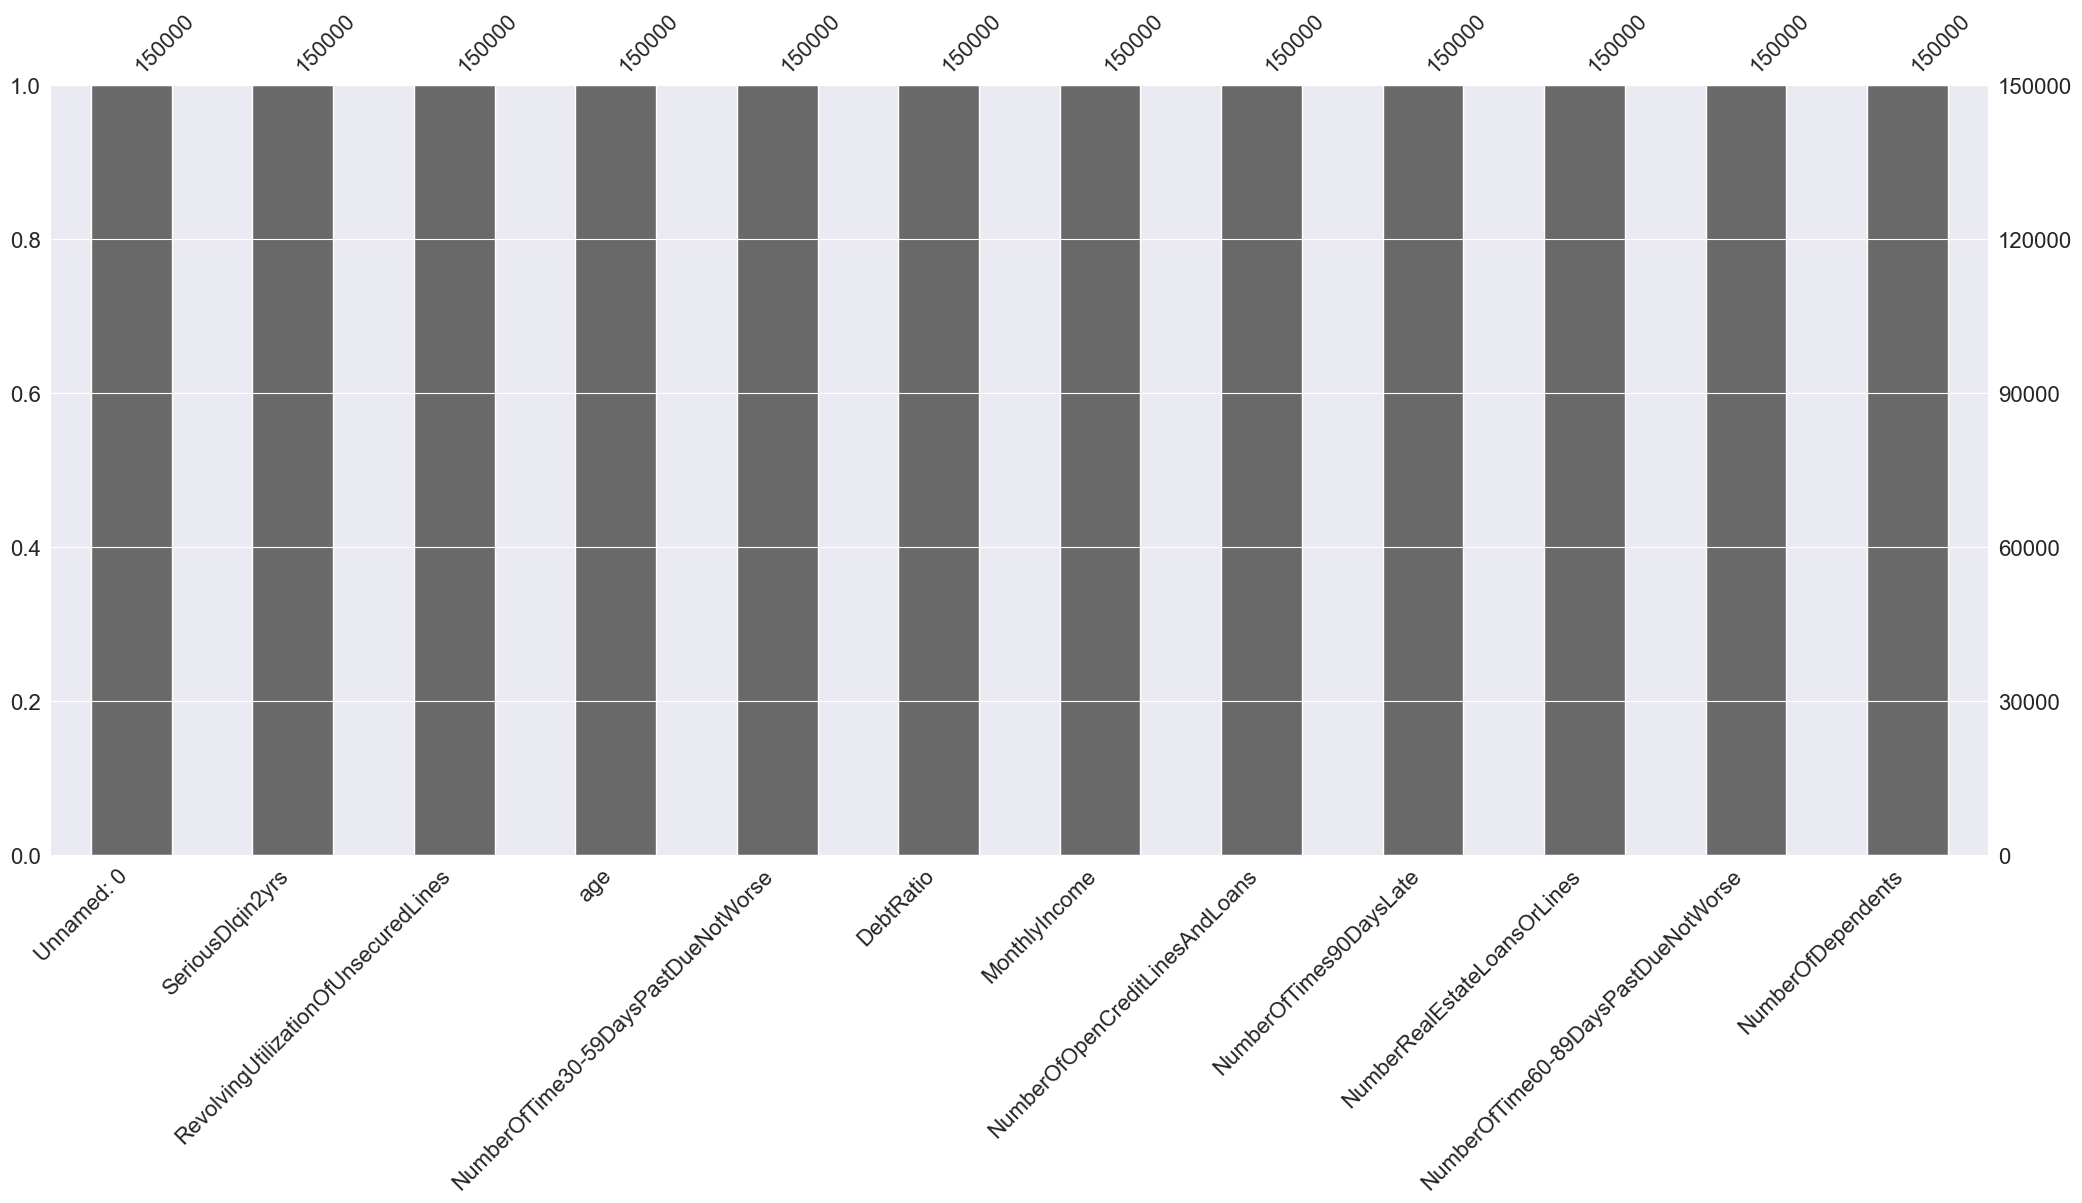

In [45]:
import missingno as msno

msno.bar(train);

Le graghique des valeurs manquantes par variable ci-dessus indique qu'aucune des variable ne contient désormais de valeurs manquantes

## Analyse descriptive descriptive de la base de données


### Les valeurs aberrantes

In [57]:
train.drop("Unnamed: 0", axis=1, inplace=True)
#Définition de la variable cible
target = train["SeriousDlqin2yrs"]

#Définition des variables explicatives, 
features = train[["RevolvingUtilizationOfUnsecuredLines", "age", "NumberOfTime30-59DaysPastDueNotWorse", "DebtRatio", "MonthlyIncome", 
                 "NumberOfOpenCreditLinesAndLoans", "NumberOfTimes90DaysLate", "NumberRealEstateLoansOrLines", "NumberOfTime60-89DaysPastDueNotWorse", "NumberOfDependents"]]


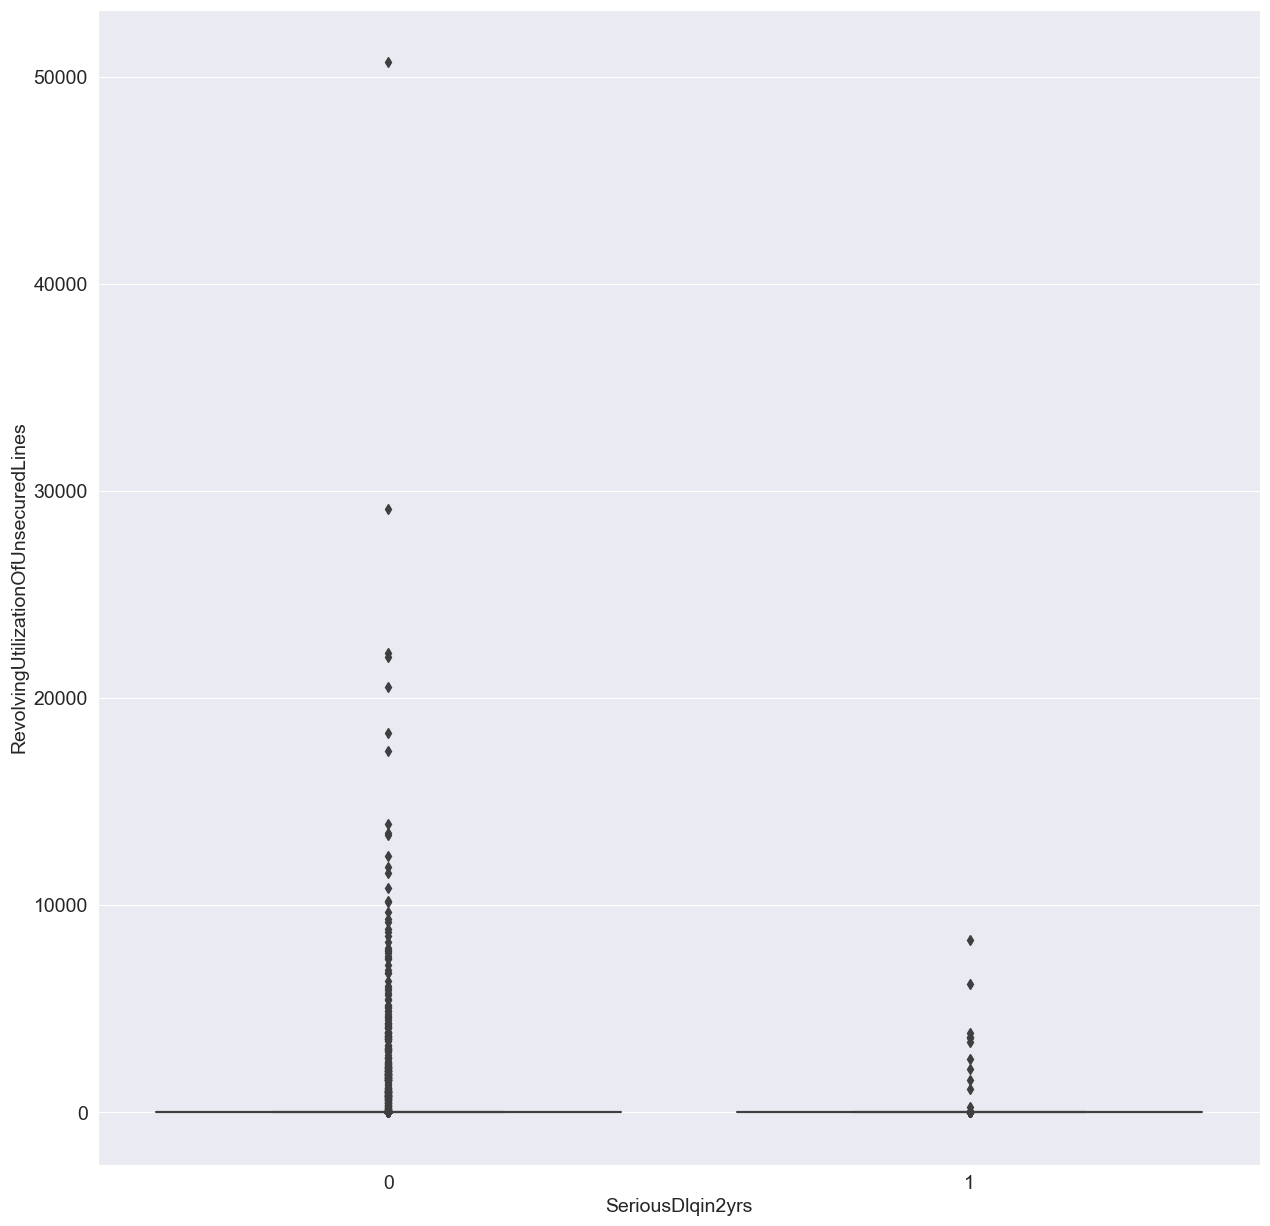

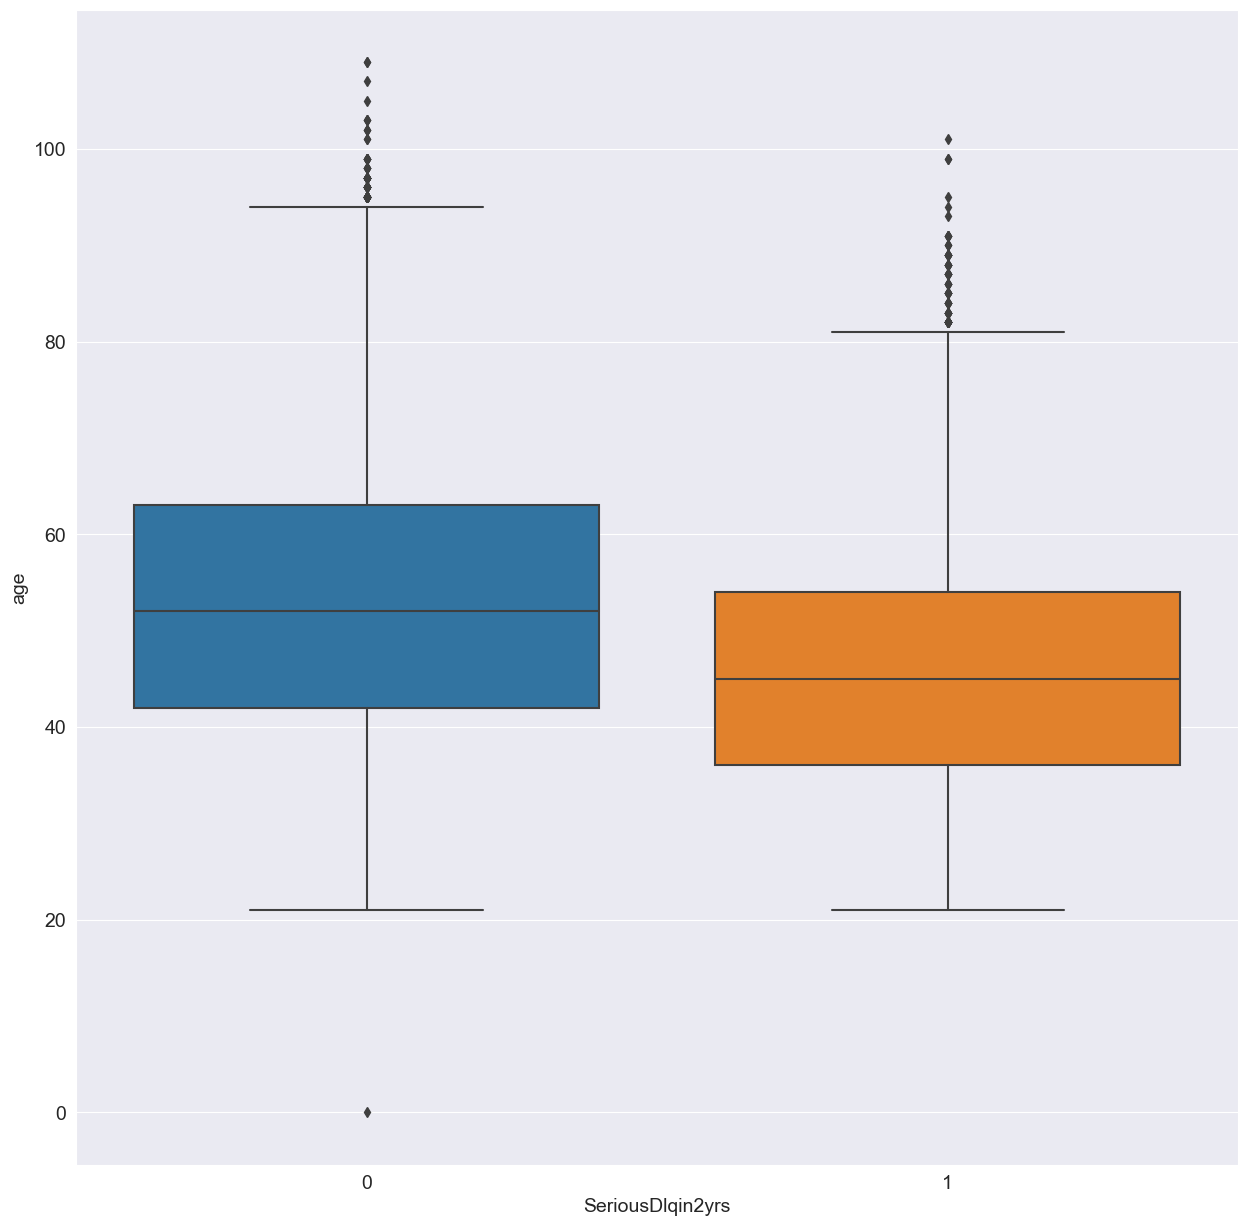

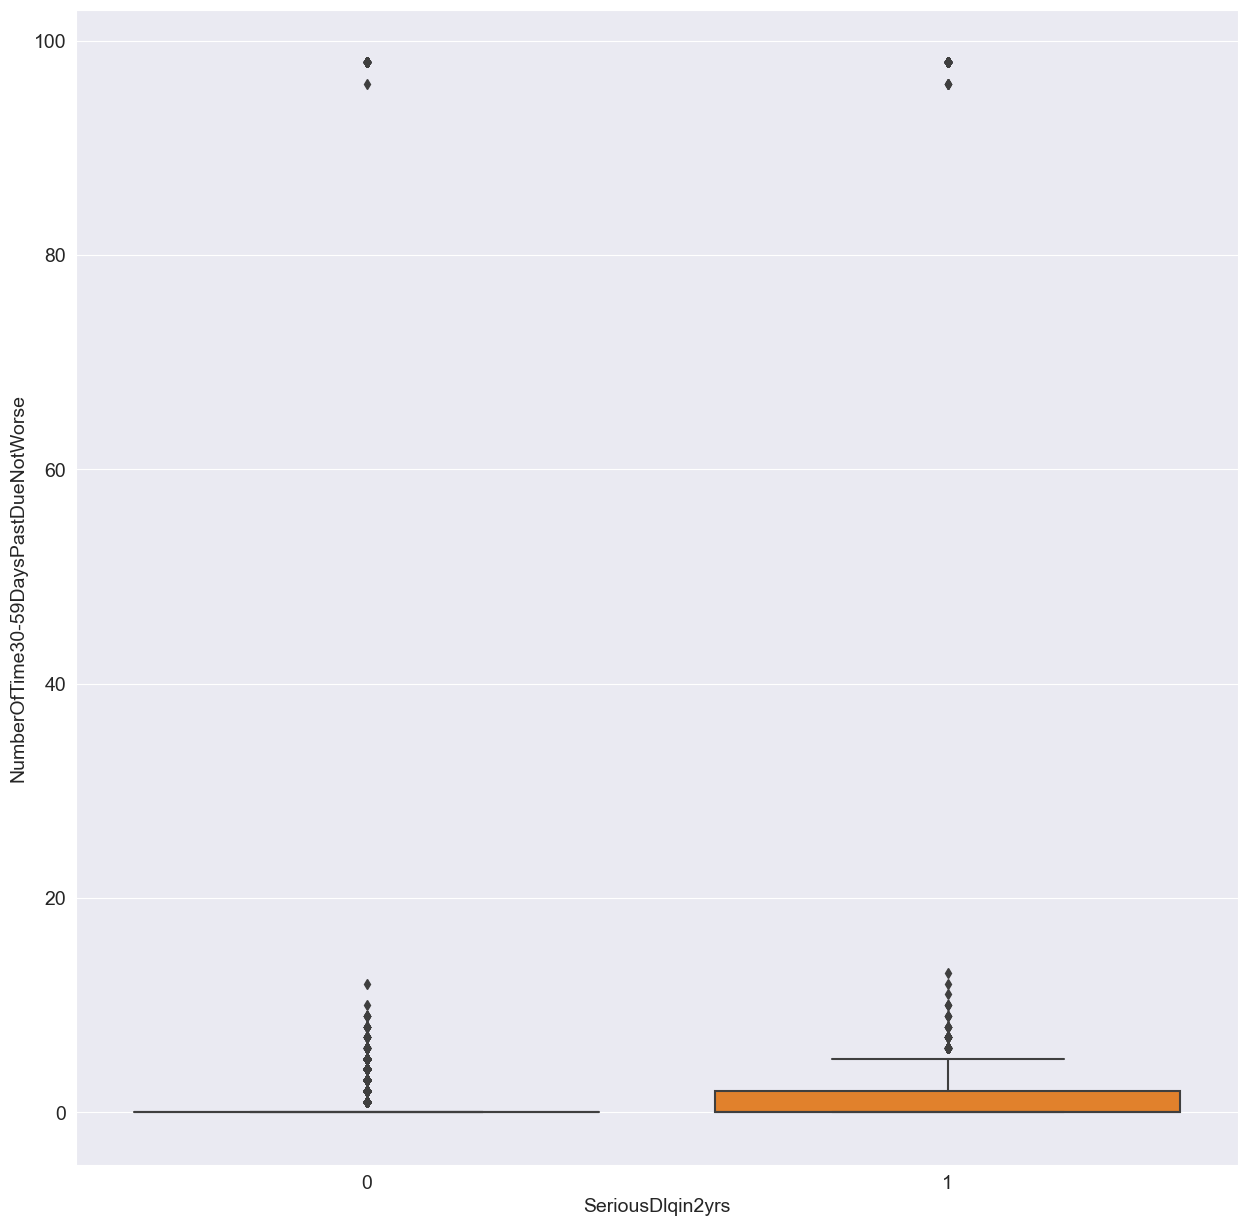

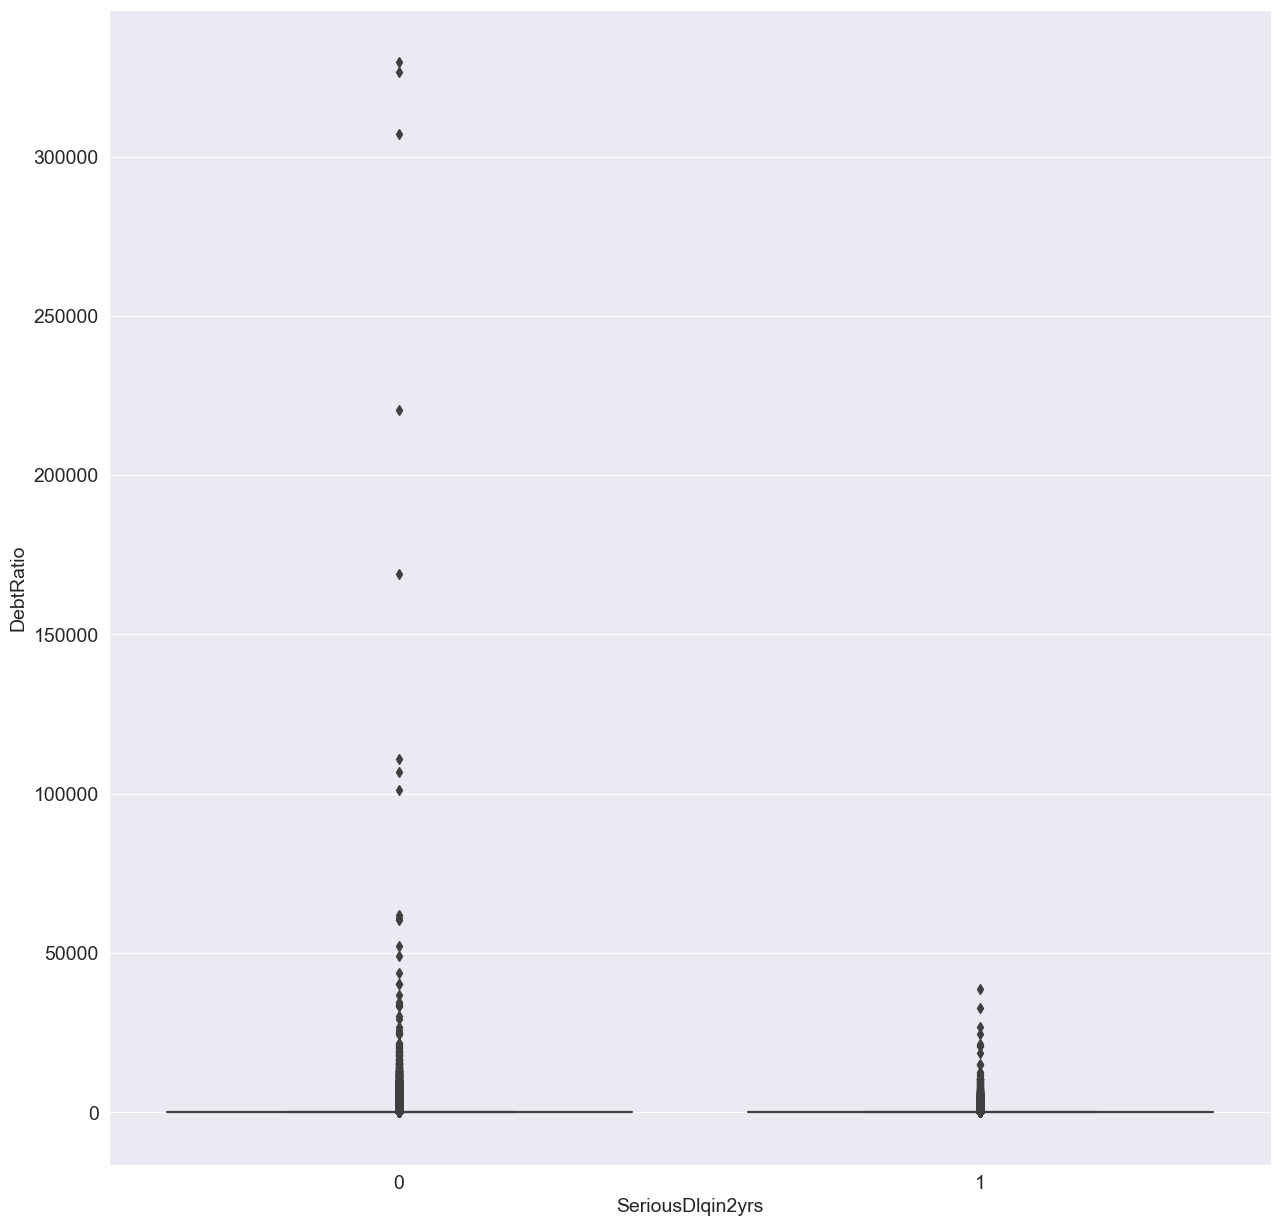

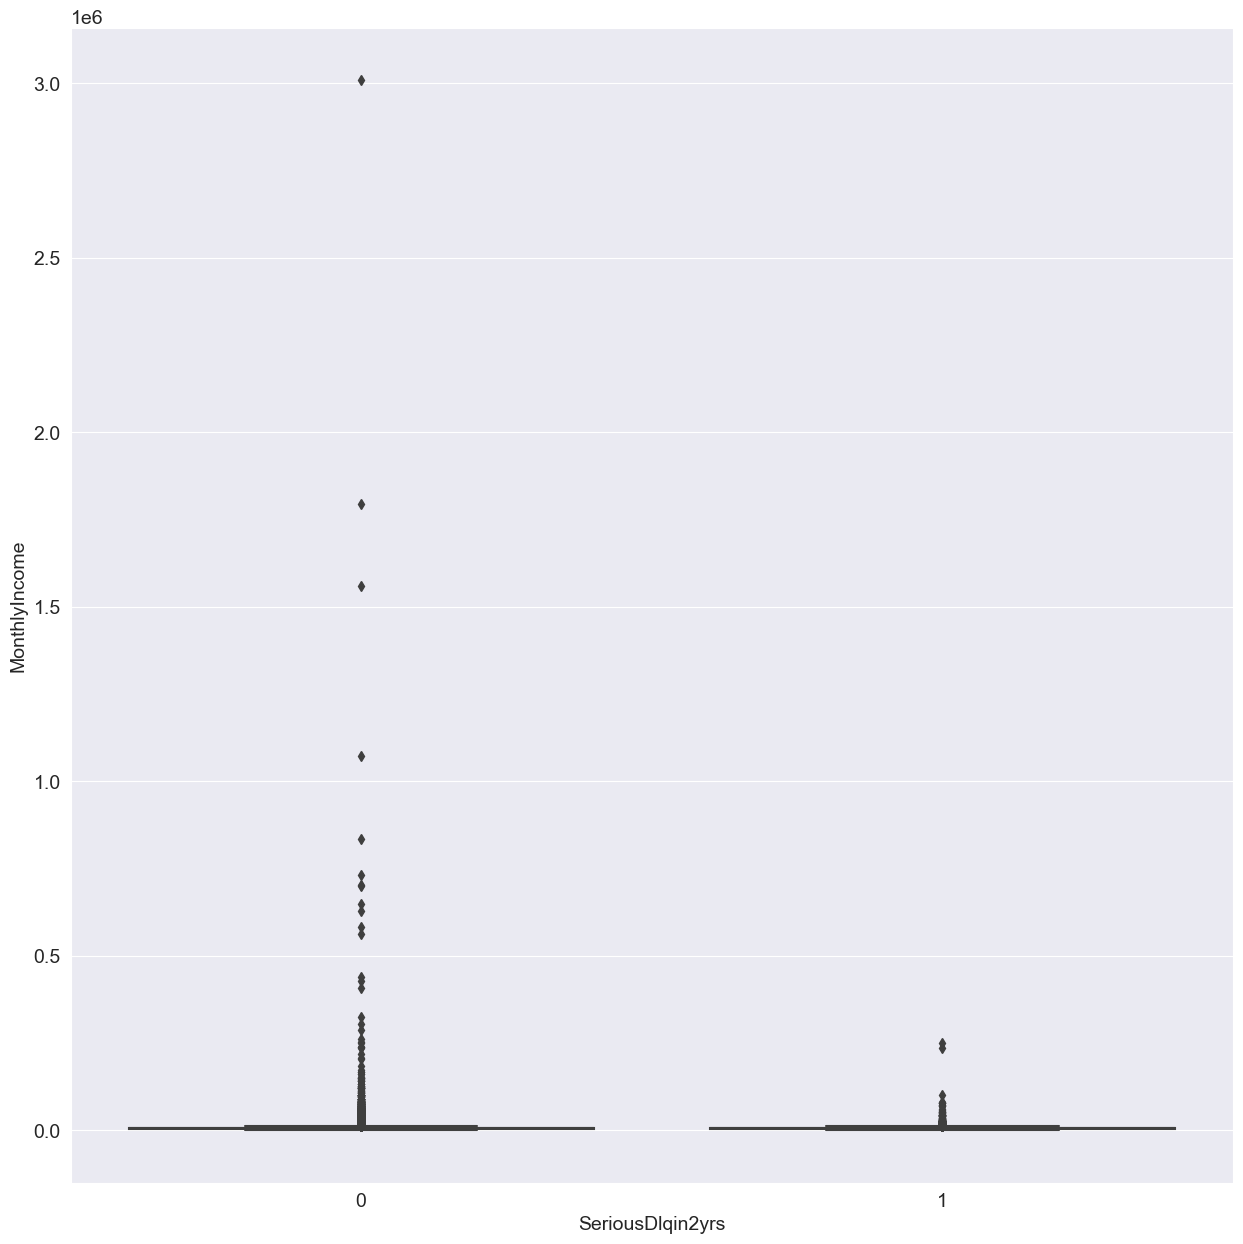

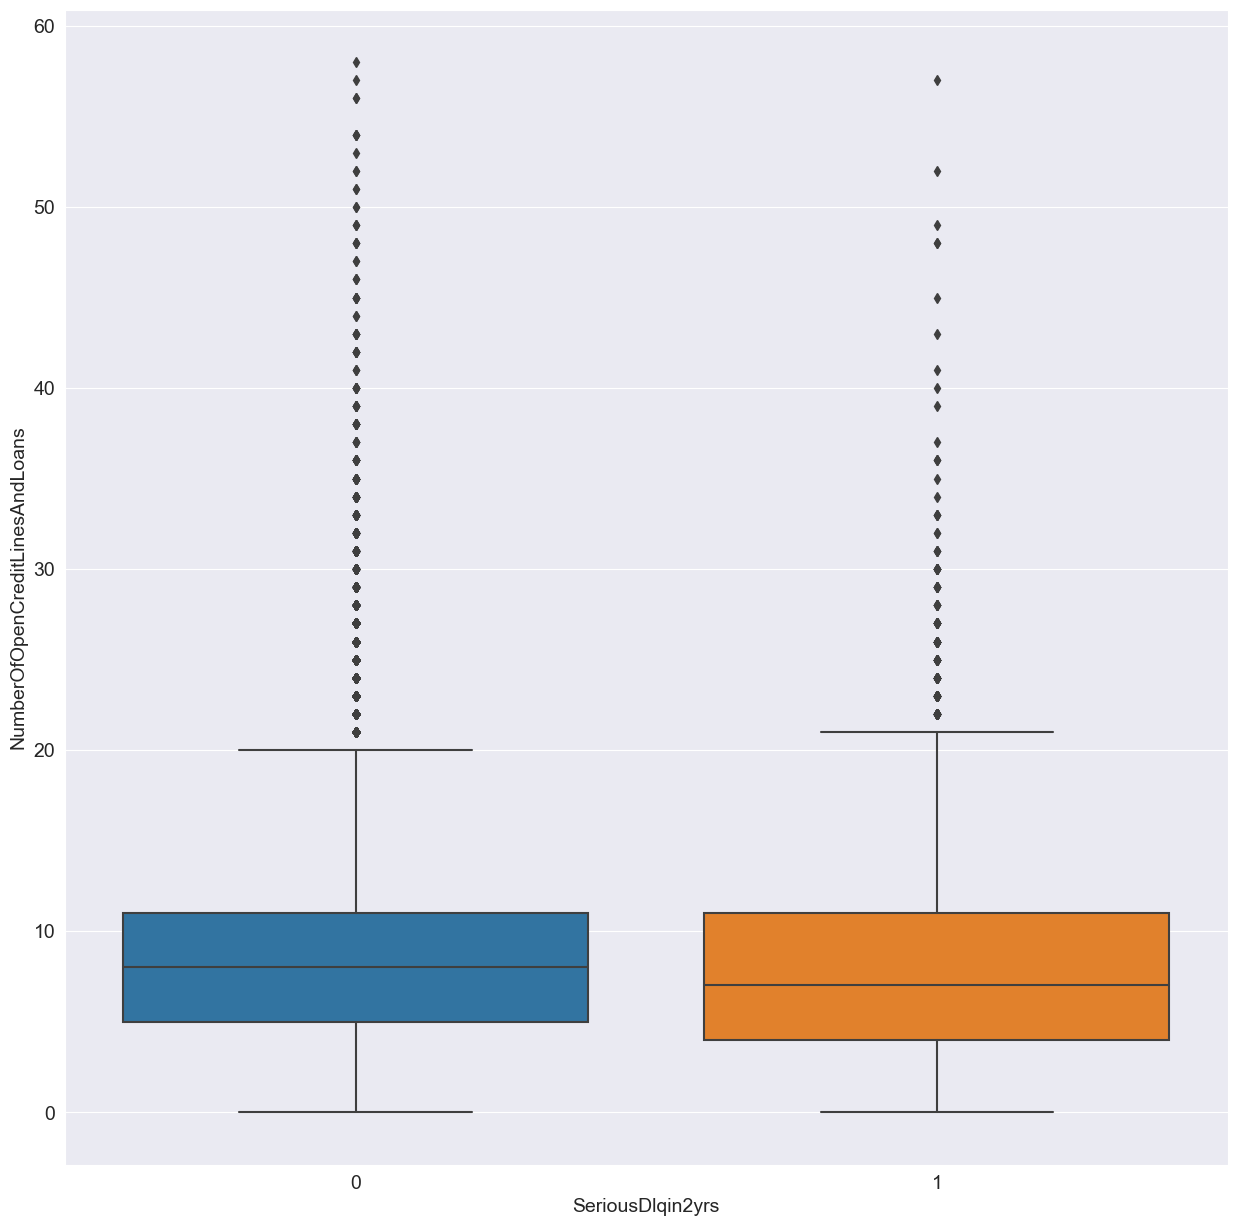

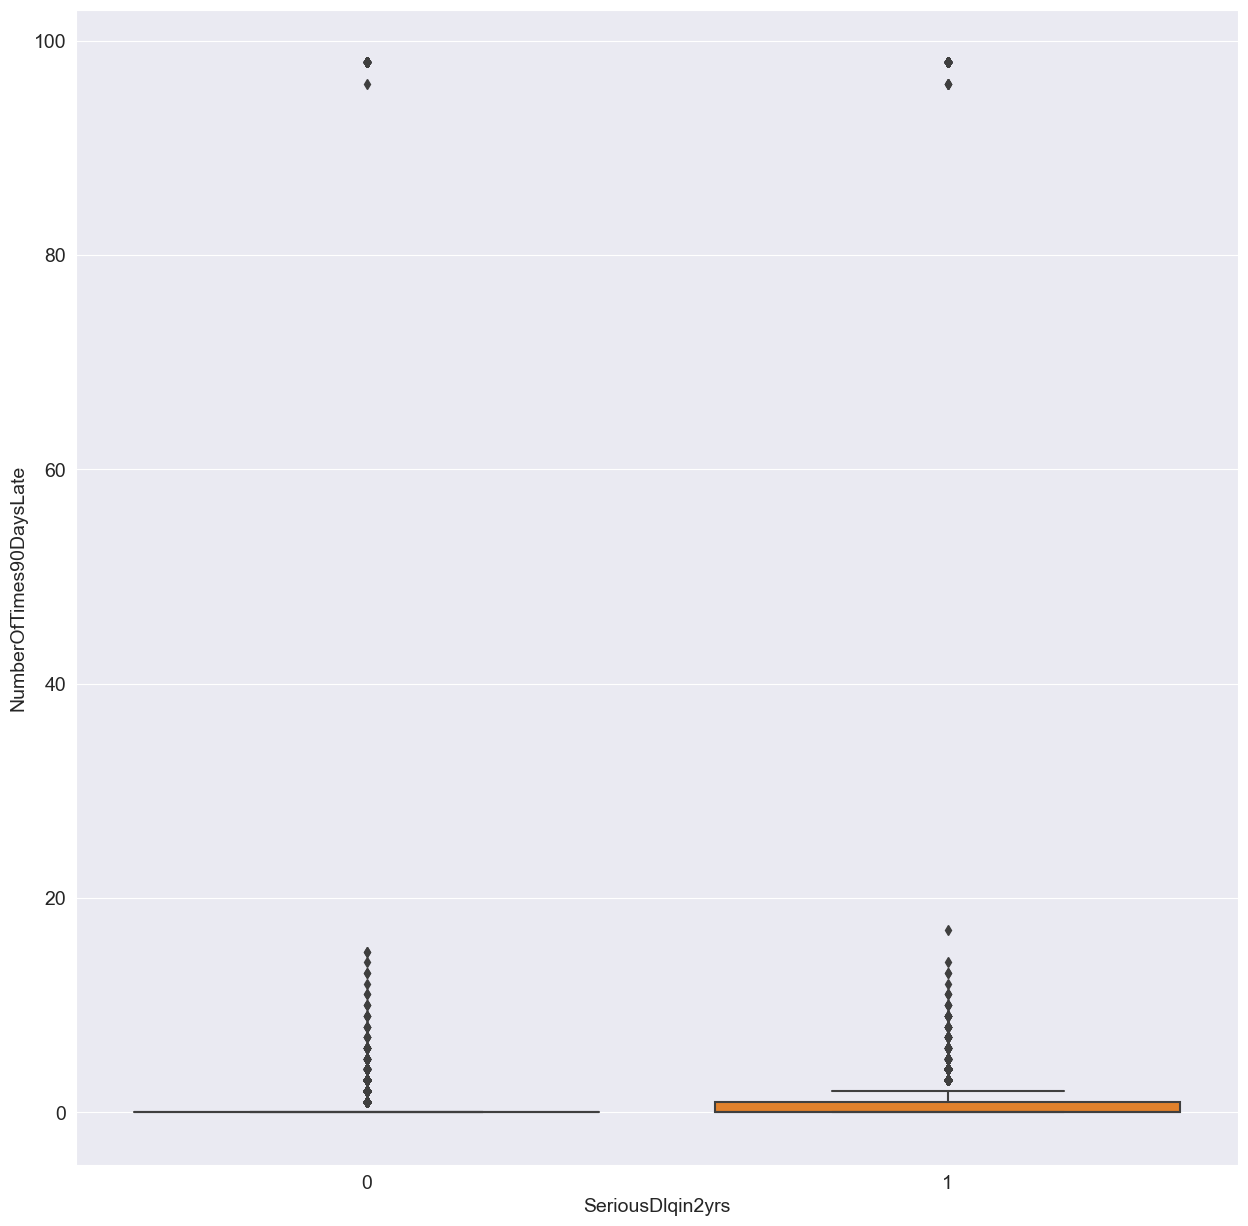

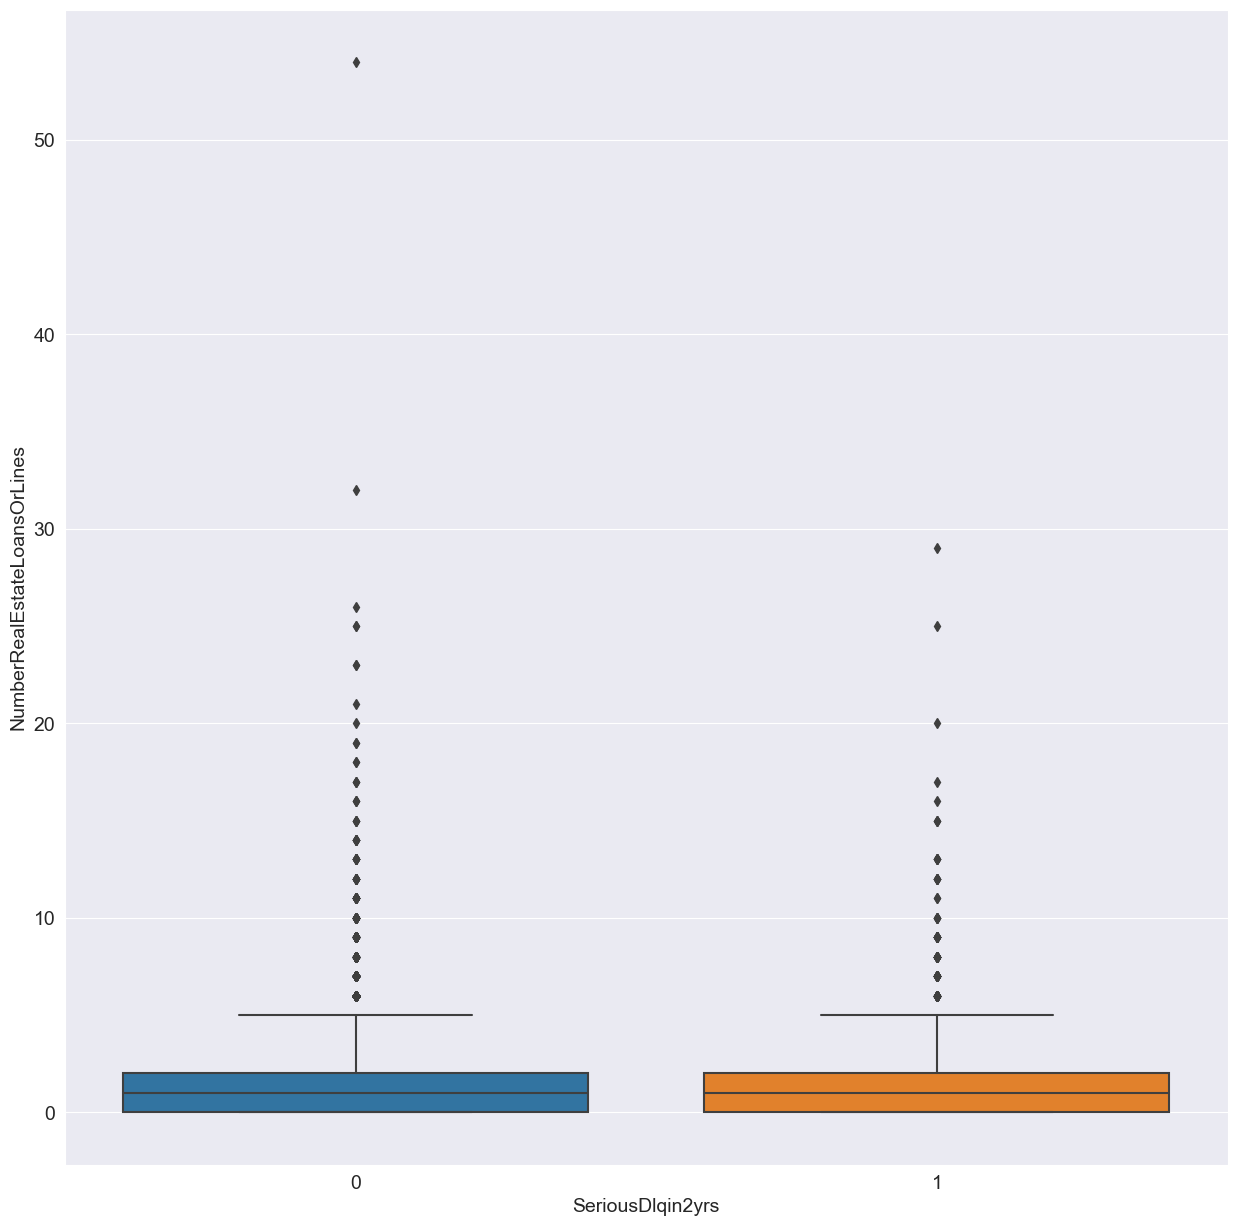

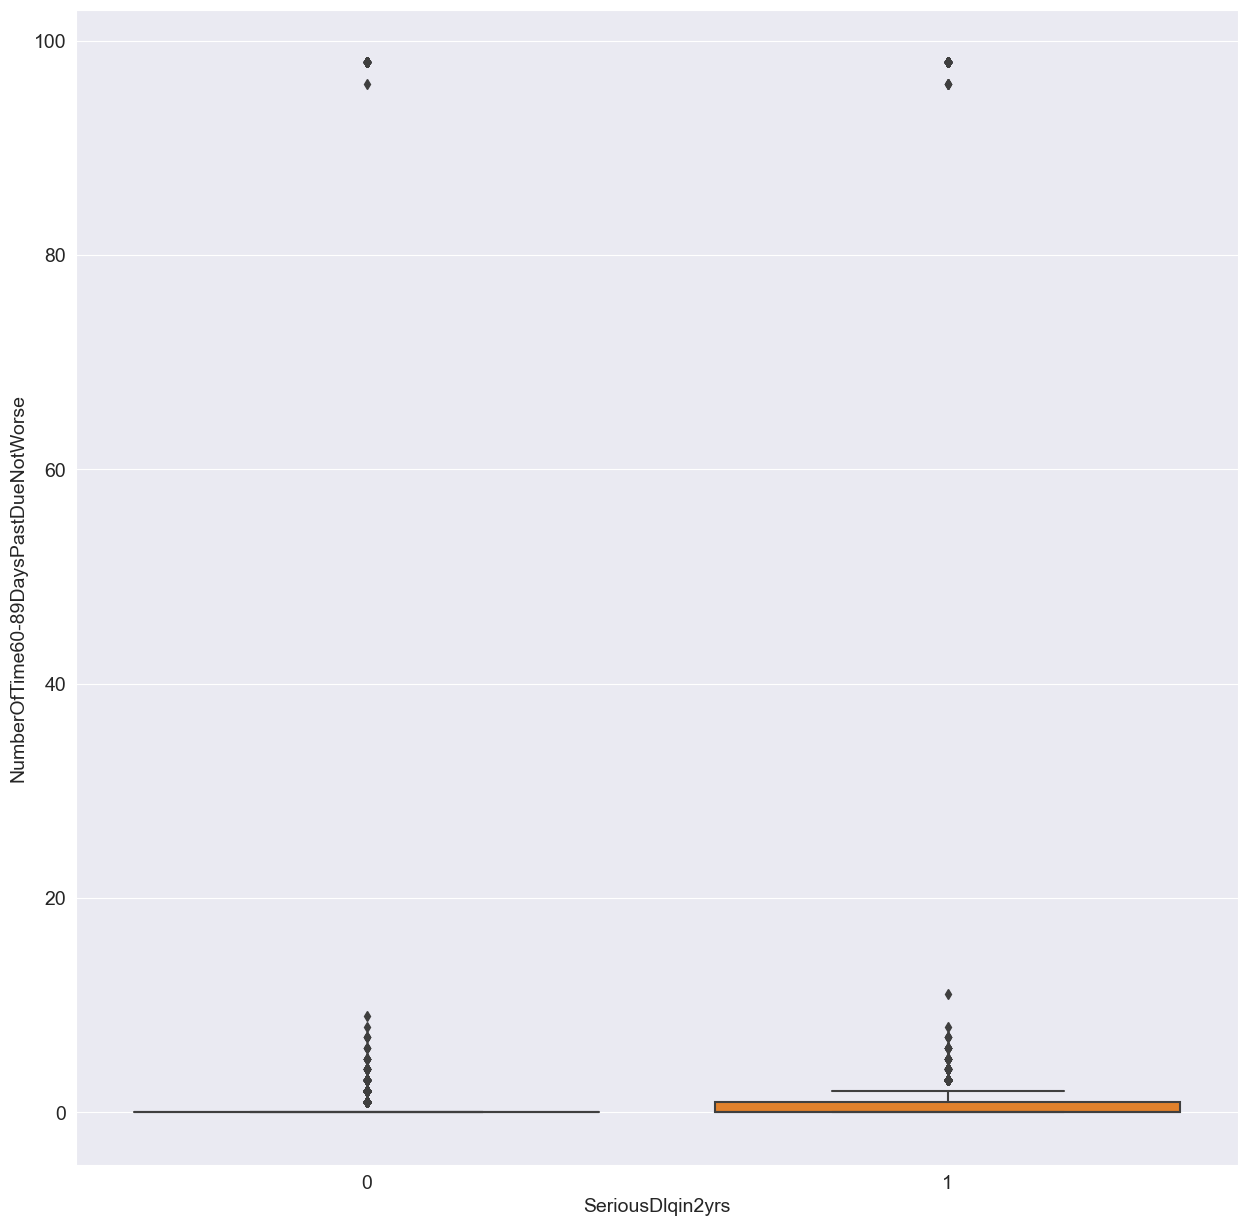

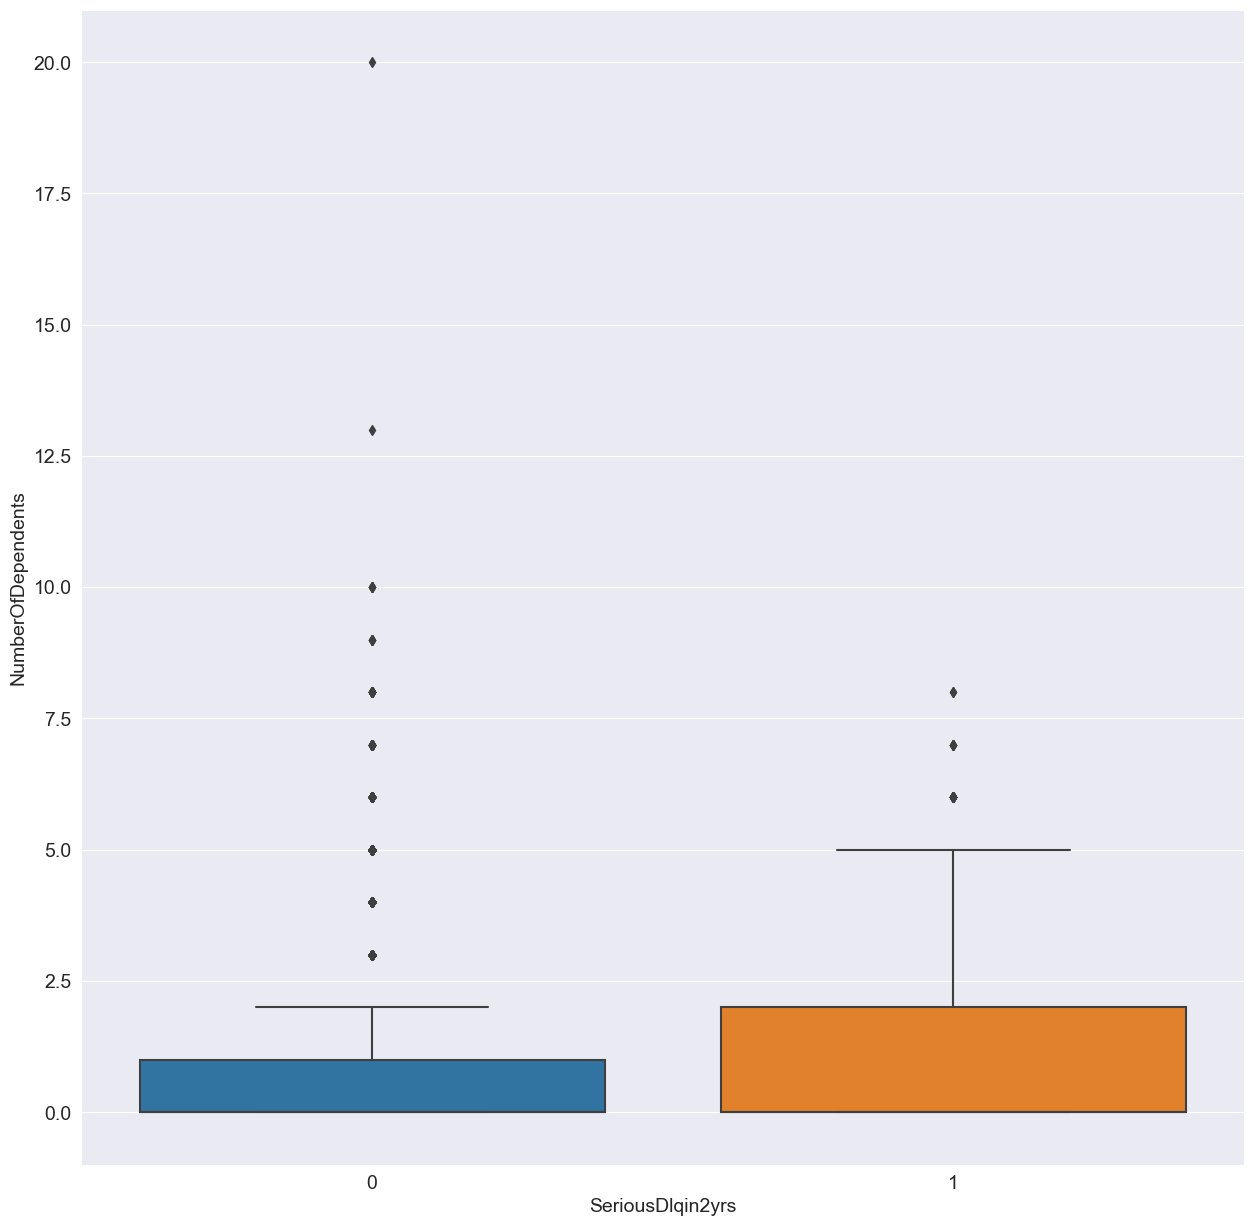

In [63]:
for col in features:
    plt.figure(figsize=(15,15))
    sns.boxplot(x="SeriousDlqin2yrs", y=col, data = train)

Le boxplot des variables explicative en fonction de la variable d'interêt suggère que plusieurs variables contiennent des valeurs aberrentes. Nous traiterons ces valeurs aberrantes dans les lignes à venir 


- Correction des valeurs aberrantes

In [66]:
def trait_aberrant (new_data_cap1,list):
            for col in list:
            
                    ### Détection des quantiles
                    percentile25 = new_data_cap1[col].quantile(0.25)
                    percentile75 = new_data_cap1[col].quantile(0.75)
                    
                    ### Intervalle interquantile
                    iqr=percentile75-percentile25
                    
                    ##Recherche des seuils pour les valeurs aberrantes
                    upper_limit = percentile75 + 1.5 * iqr
                    lower_limit = percentile25 - 1.5 * iqr

                    ##Les valeurs aberantes
                    new_data_cap1[new_data_cap1[col] > upper_limit] 
                    new_data_cap1[new_data_cap1[col] < lower_limit]

                    #
                    new_data_cap1 = new_data_cap1.copy()
                    new_data_cap1[col] = np.where(
                        new_data_cap1[col] > upper_limit,
                        upper_limit,
                        np.where(
                            new_data_cap1[col] < lower_limit,
                            lower_limit,
                            new_data_cap1[col]
                        )
                    )

                    #### Représentation graphiques
                    plt.figure(figsize=(16,8))
                    plt.subplot(2,2,1)
                    sns.distplot(new_data_cap1[col])
                    plt.subplot(2,2,2)
                    sns.boxplot(new_data_cap1[col])
                    plt.subplot(2,2,3)
                    sns.distplot(new_data_cap1[col])
                    plt.subplot(2,2,4)
                    sns.boxplot(new_data_cap1[col])
                    plt.show()

                    ### Retouner les donnees sans les valeurs aberrantes
            return new_data_cap1 

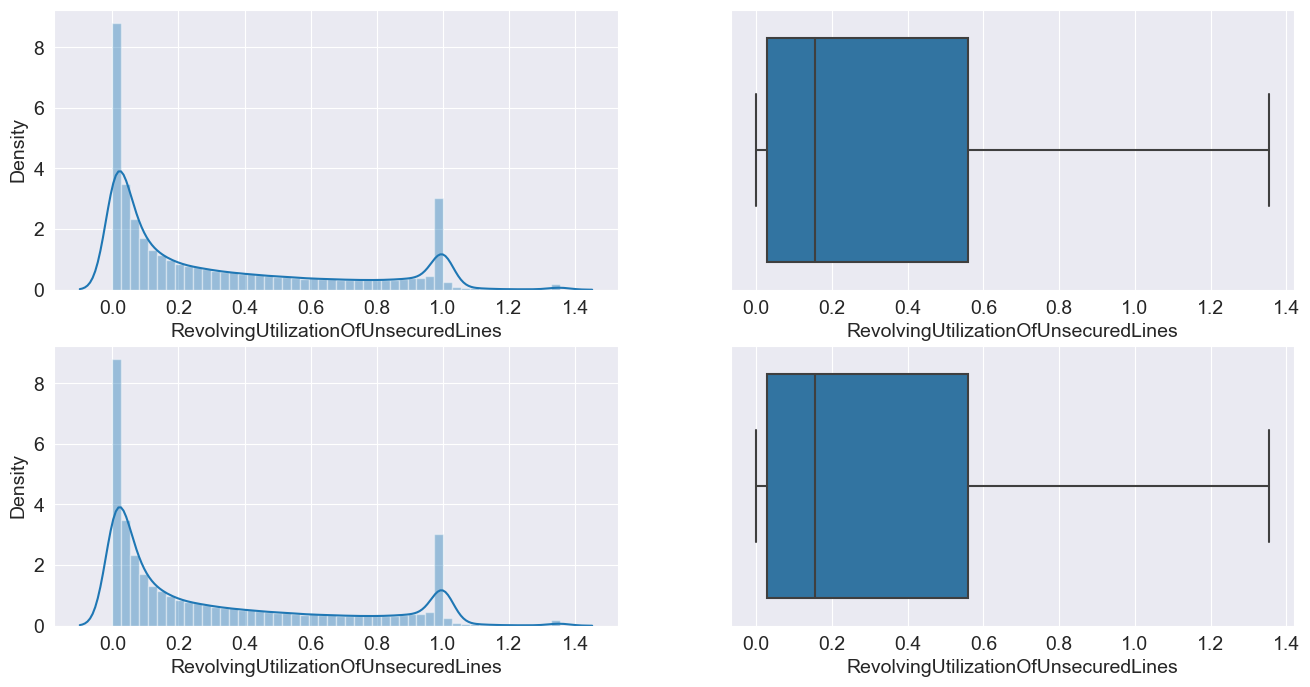

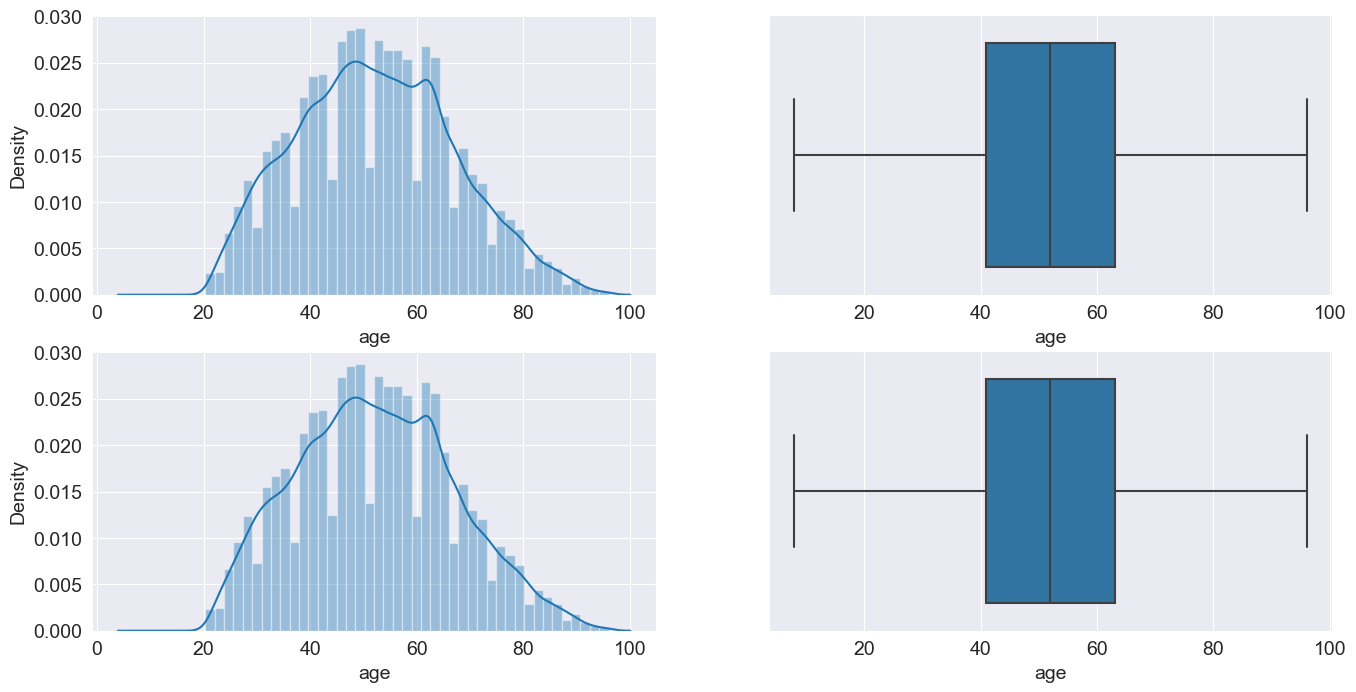

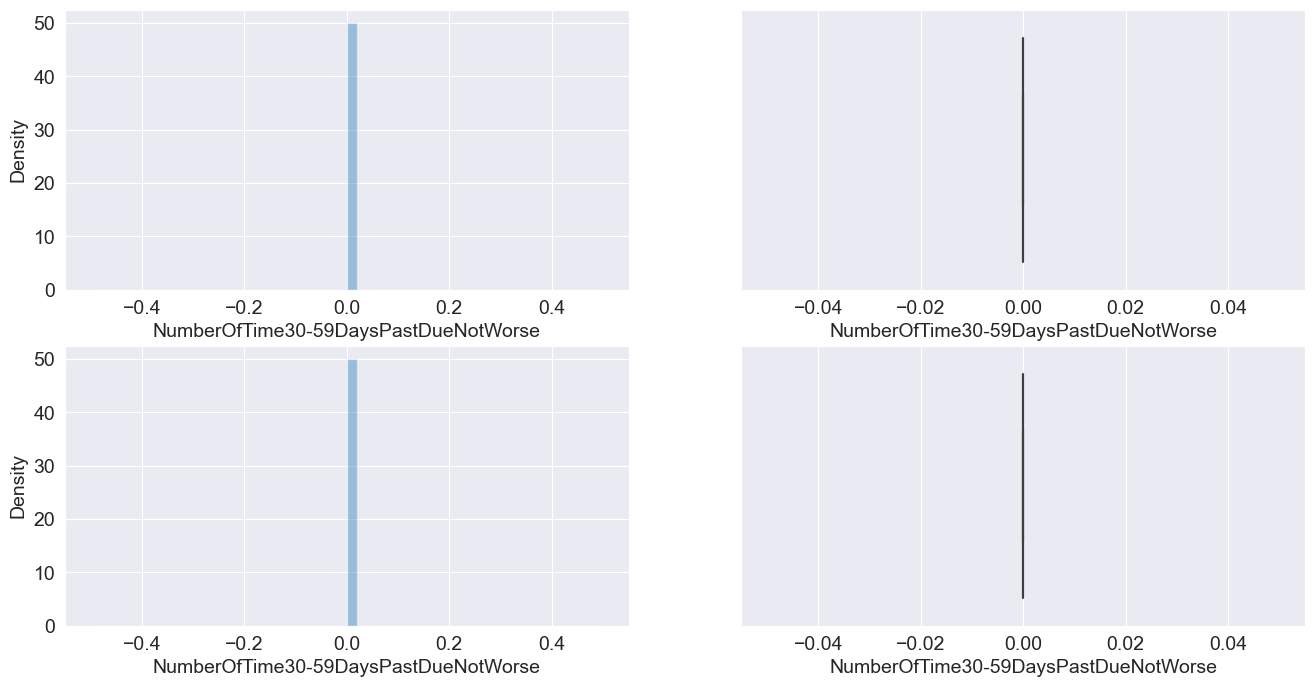

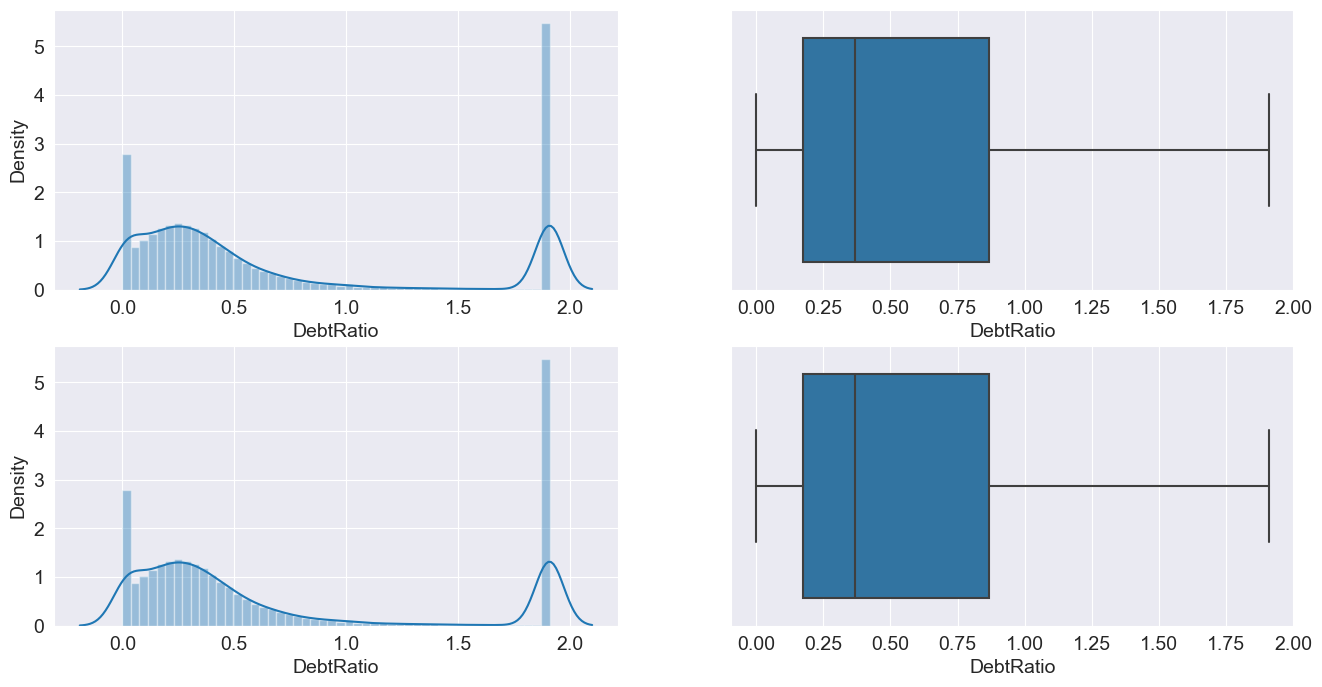

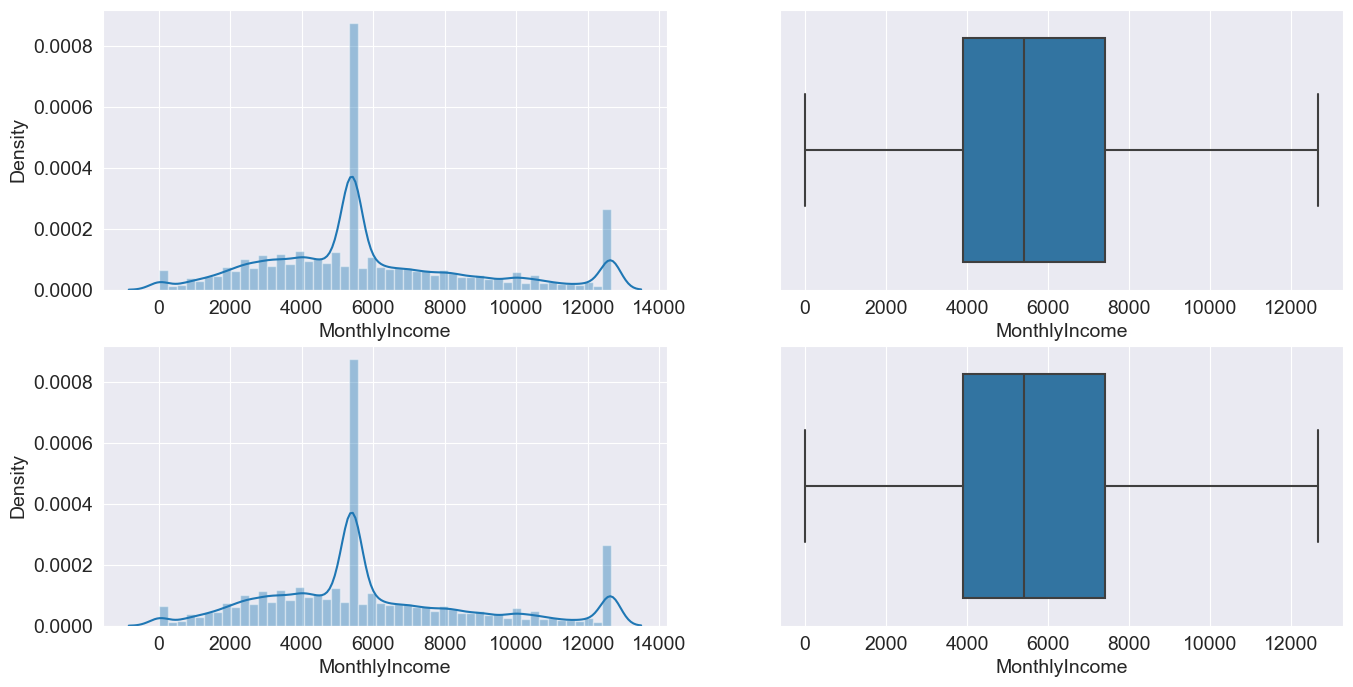

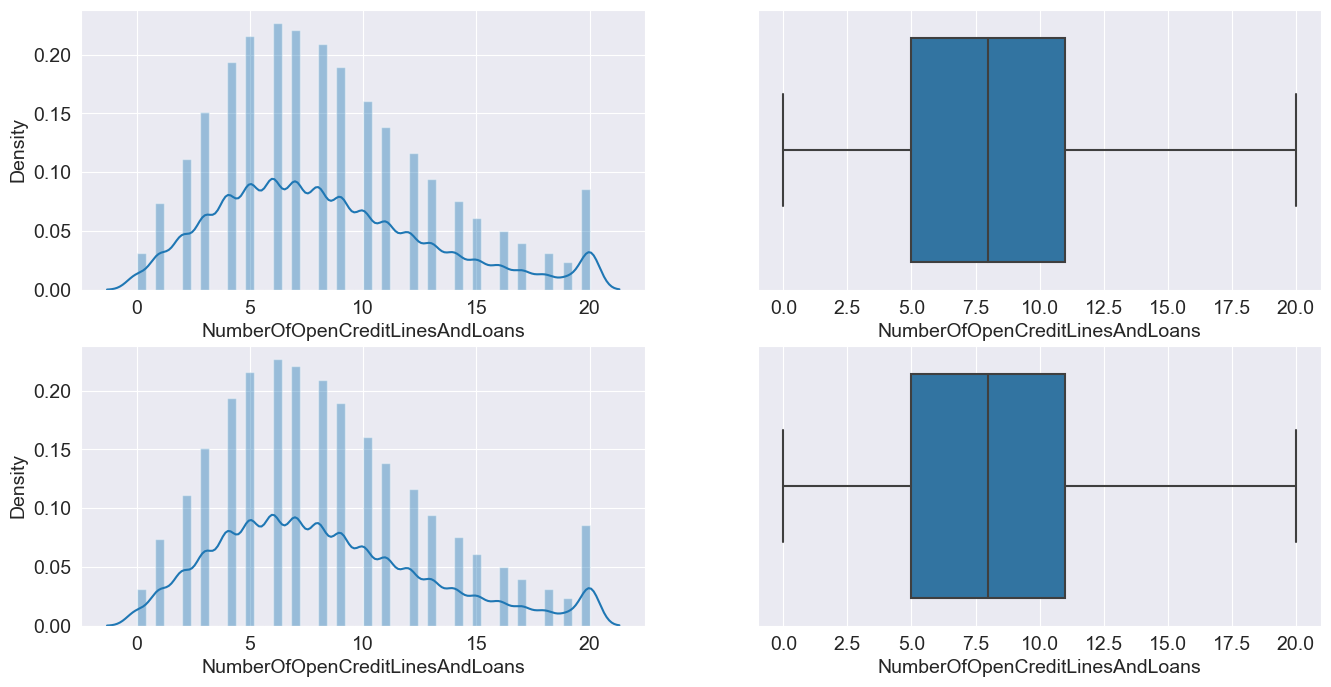

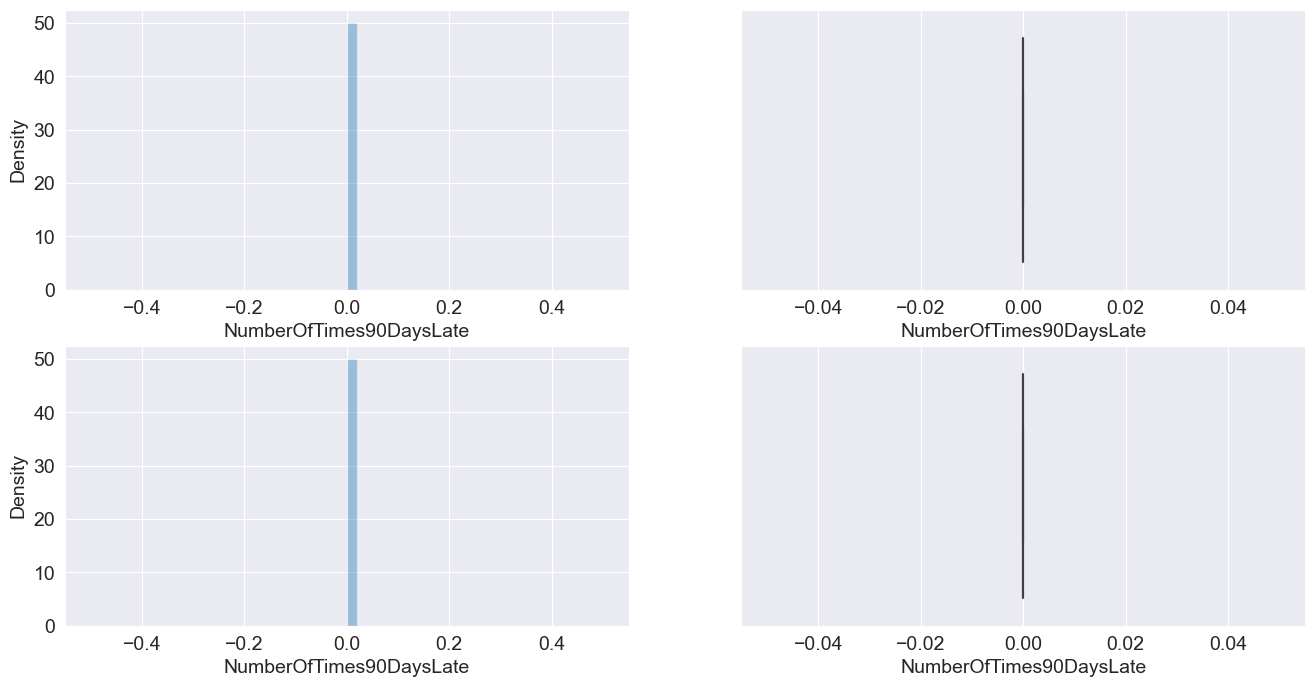

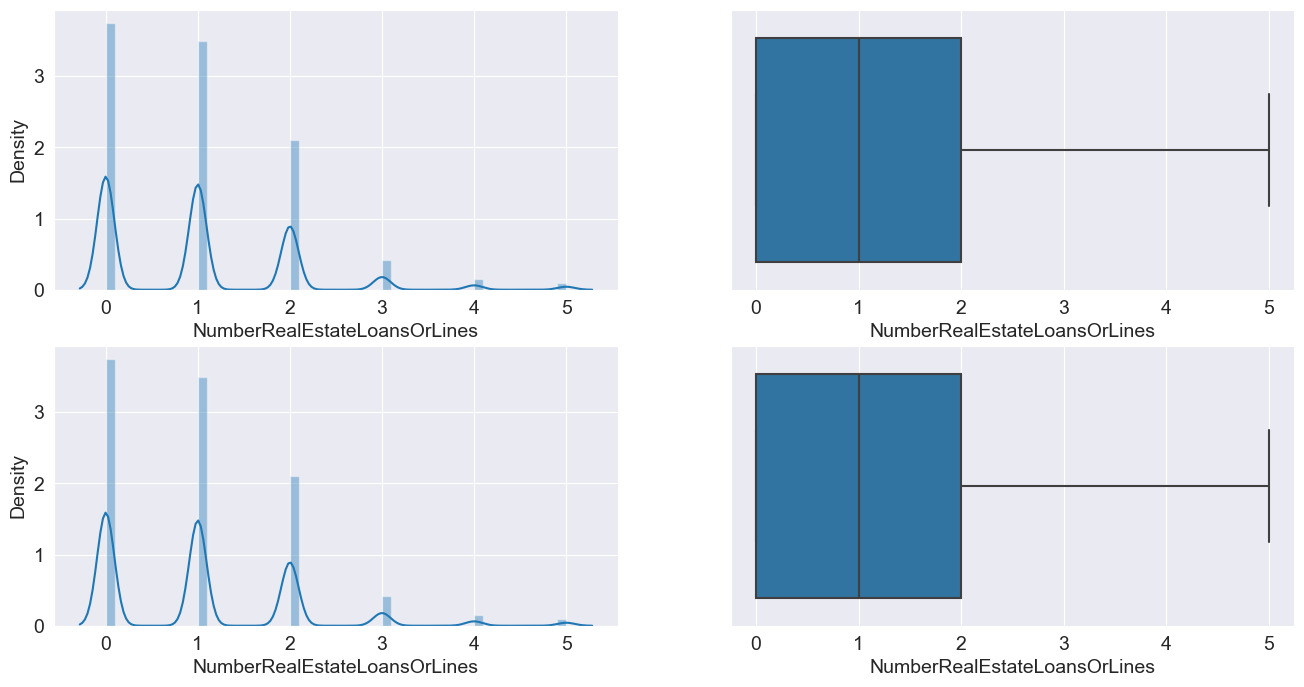

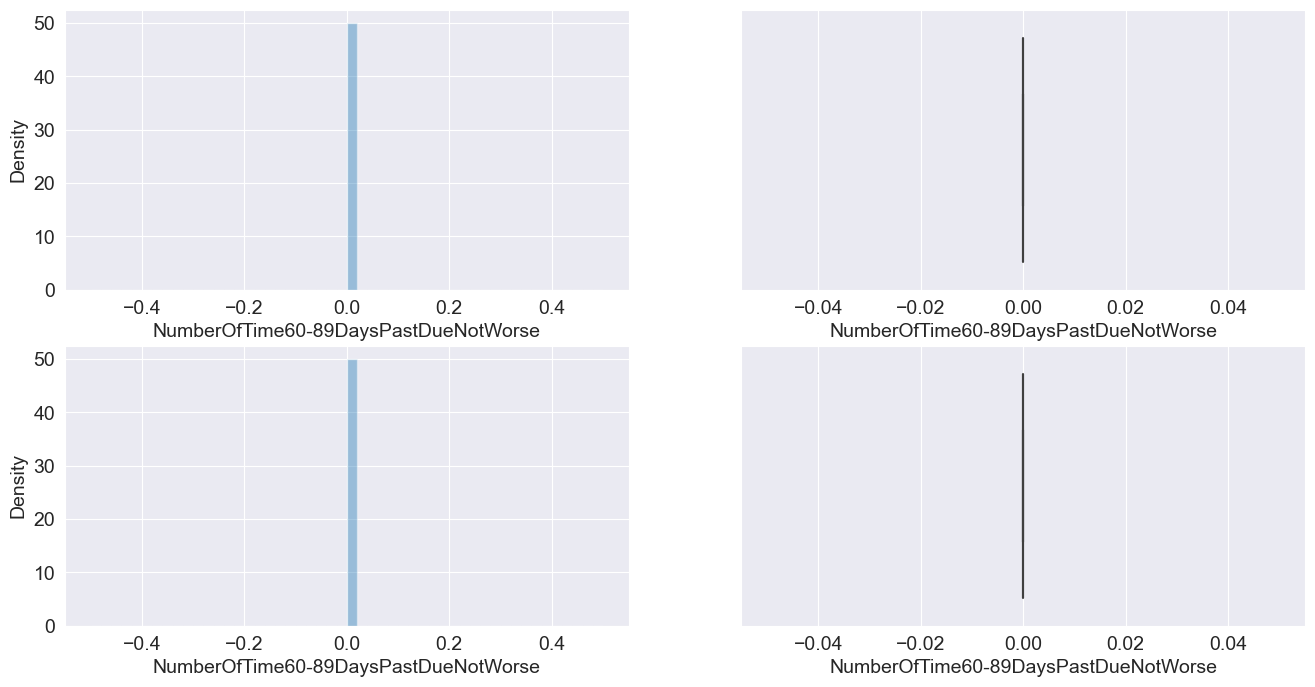

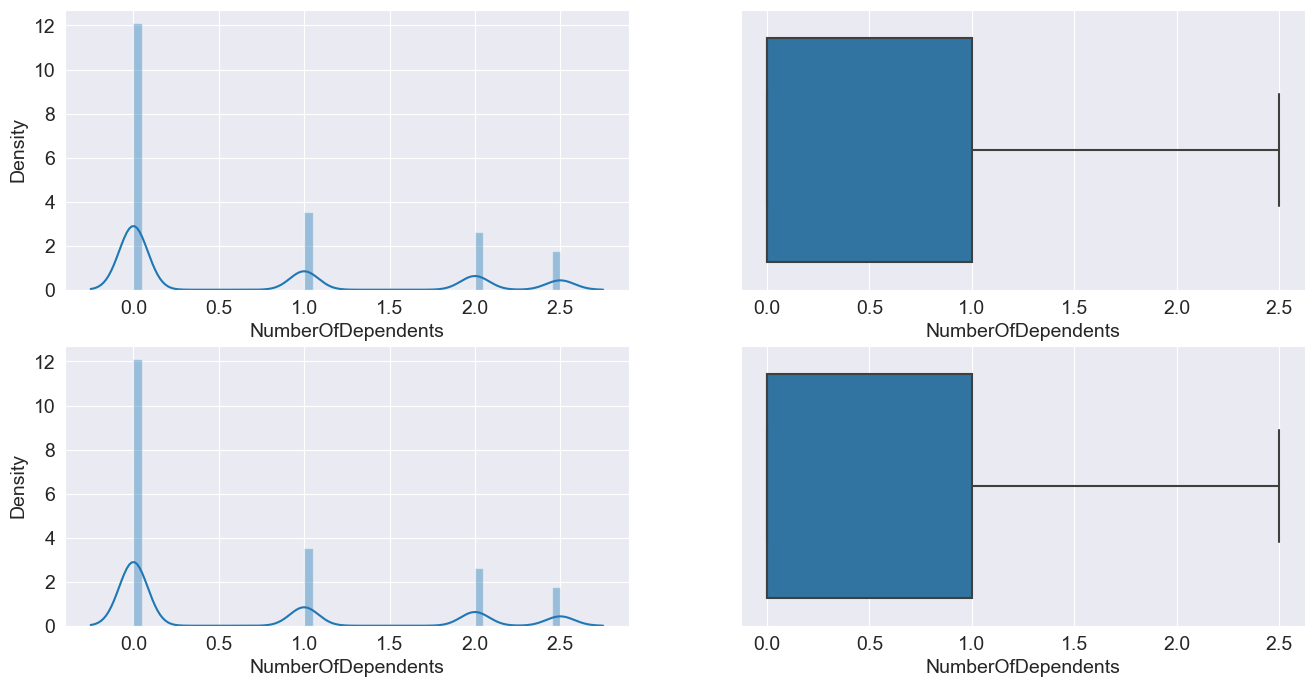

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.766,45.000,0.000,0.803,9120.000,13.000,0.000,5.000,0.000,2.000
1,0.957,40.000,0.000,0.122,2600.000,4.000,0.000,0.000,0.000,1.000
2,0.658,38.000,0.000,0.085,3042.000,2.000,0.000,0.000,0.000,0.000
3,0.234,30.000,0.000,0.036,3300.000,5.000,0.000,0.000,0.000,0.000
4,0.907,49.000,0.000,0.025,12645.500,7.000,0.000,1.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...
149995,0.041,74.000,0.000,0.225,2100.000,4.000,0.000,1.000,0.000,0.000
149996,0.300,44.000,0.000,0.717,5584.000,4.000,0.000,1.000,0.000,2.000
149997,0.246,58.000,0.000,1.908,5400.000,18.000,0.000,1.000,0.000,0.000
149998,0.000,30.000,0.000,0.000,5716.000,4.000,0.000,0.000,0.000,0.000


In [70]:
import warnings
warnings.filterwarnings('ignore')
trait_aberrant(features, features.columns)

#### Les correlations entre les variables explicatives et la variable cible

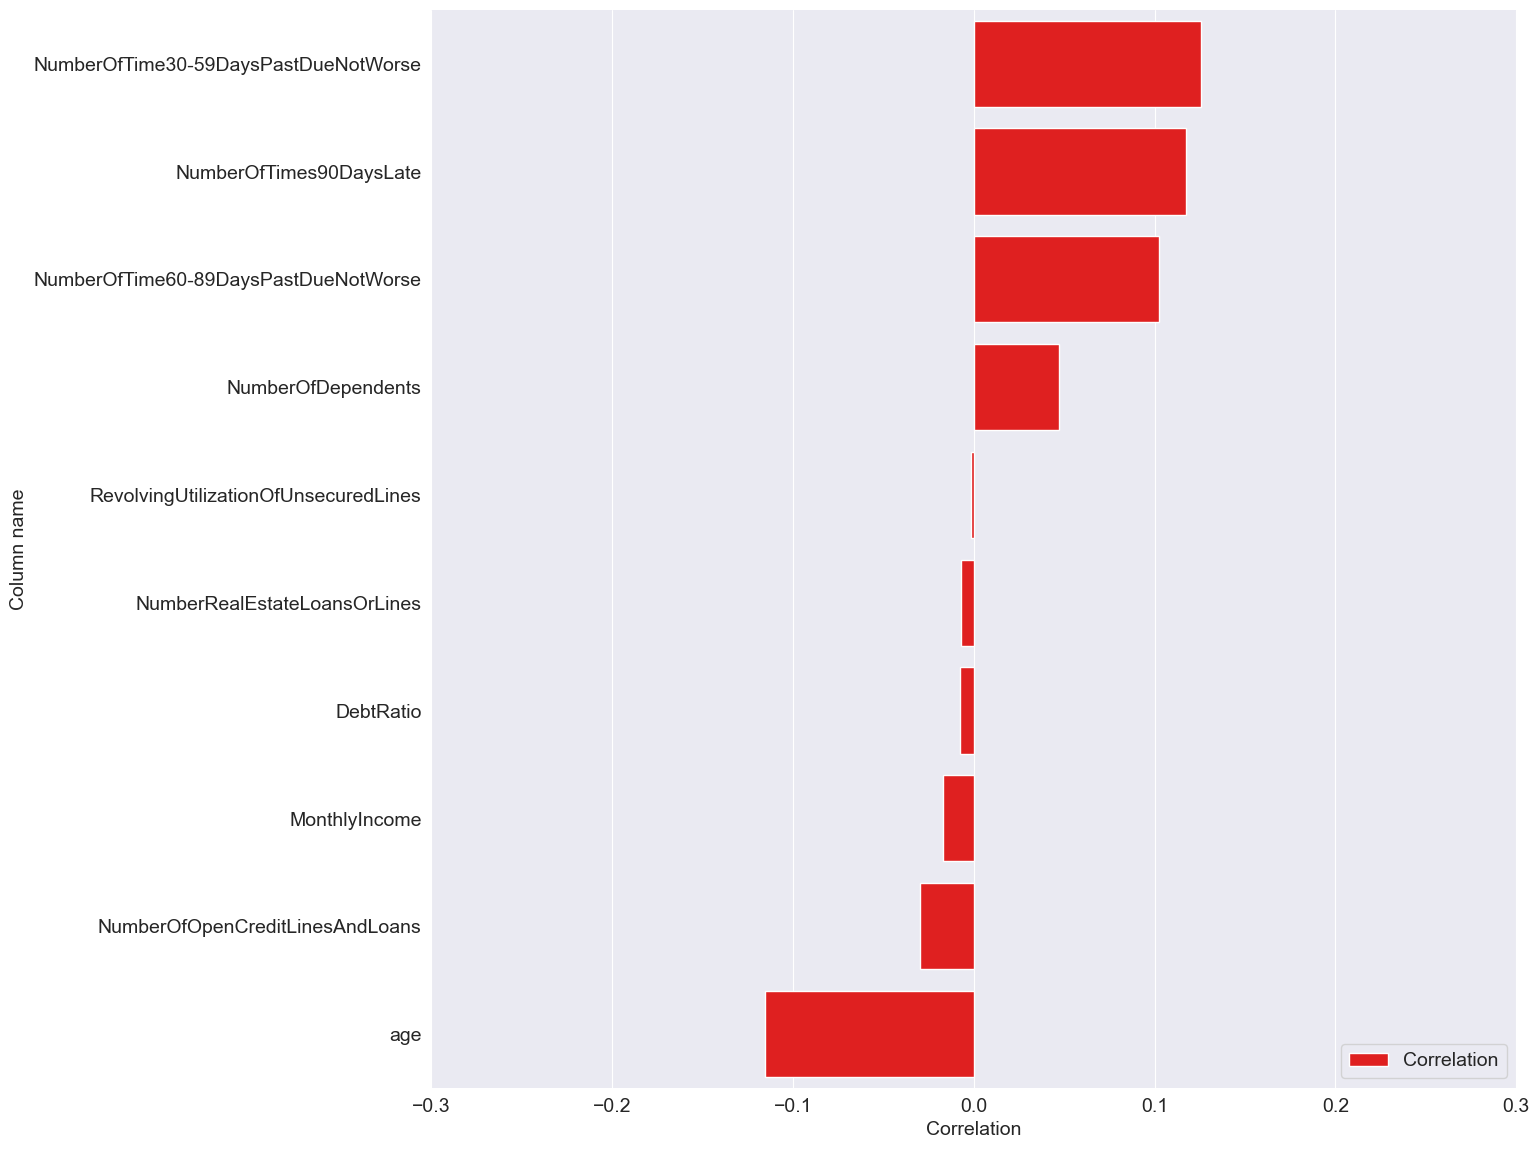

In [72]:
plt.figure(figsize=(14,14))
y_corr = train.corr().loc["SeriousDlqin2yrs"].sort_values(ascending=False).drop("SeriousDlqin2yrs",axis = 0).dropna()

ax = sns.barplot(y=y_corr.index.values, x=y_corr.values,
            label="Correlation", color="r")
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(-0.3, 0.3), ylabel="Column name",
       xlabel="Correlation")
sns.despine(left=True, bottom=True)

De facon générale, les variables explicative de notre ensemble de données ont une correlation relativement faible (coefficient de correlation linéaire de l'ordre de 0,1 avec la variable d'intérêt). Plus particulièrement, la variables NumberRealEstateLoansOrLines (nombre  de prêts hypothécaires et immobiliers) et  RevolvingUtilizationOfUnsecuredLines (Solde total des cartes de crédit et des lignes de crédit personnelles), est très faiblement correlé avec la variable d'intérêt. Nous utiliserons. 
Nous écarterons donc ces deux variables de nos variables explicatives.

In [75]:
features.drop(["NumberRealEstateLoansOrLines","RevolvingUtilizationOfUnsecuredLines"], inplace=True, axis=1)

#### Les autocorrelations des variables explicatives


<AxesSubplot:>

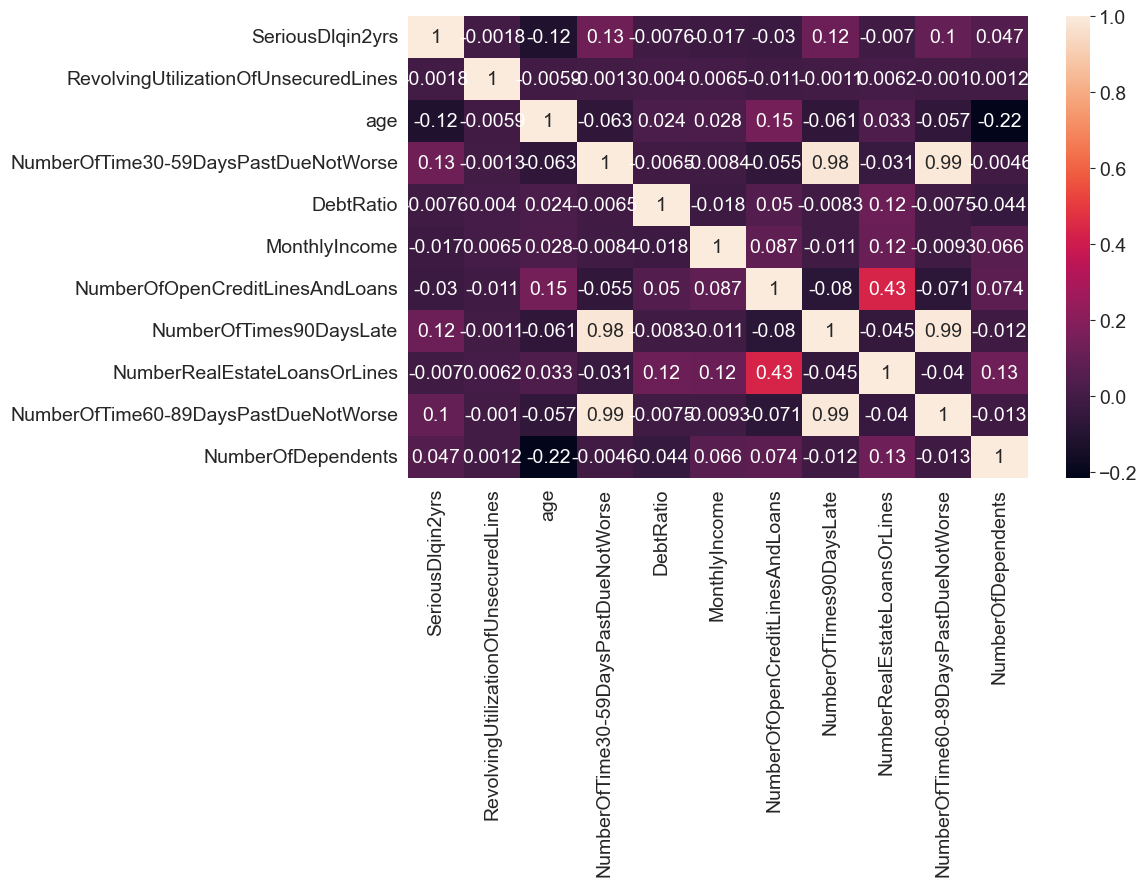

In [76]:
feature_corr = train.corr()
sns.heatmap(feature_corr, annot=True)

Les variables **NumberOfTimes90DaysLate**, **NumberOfTime60-89DaysPastDueNotWorse** et **NumberOfTime30-59DaysPastDueNotWorse** sont très fortement correlées entre elles. Ainsi les conserver simultanément n'apportera pas d'information supplémentaire par rapport à si nous ne gardions qu'une seule d'entre elles. Nous supprimerons donc 2 de ces variables et garderons la **NumberOfTime30-59DaysPastDueNotWorse**.

In [78]:
features.drop(["NumberOfTimes90DaysLate", "NumberOfTime60-89DaysPastDueNotWorse"], inplace=True, axis=1)

In [79]:
features.head()

,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfDependents
0,45,2,0.803,9120.000,13,2.000
1,40,0,0.122,2600.000,4,1.000
2,38,1,0.085,3042.000,2,0.000
3,30,0,0.036,3300.000,5,0.000
4,49,1,0.025,63588.000,7,0.000


#### Représentation du déséquilibre de classe pour la variable d'intérêt, SeriousDlqin2yrs : l'individu est en défaut de paiement ou encore

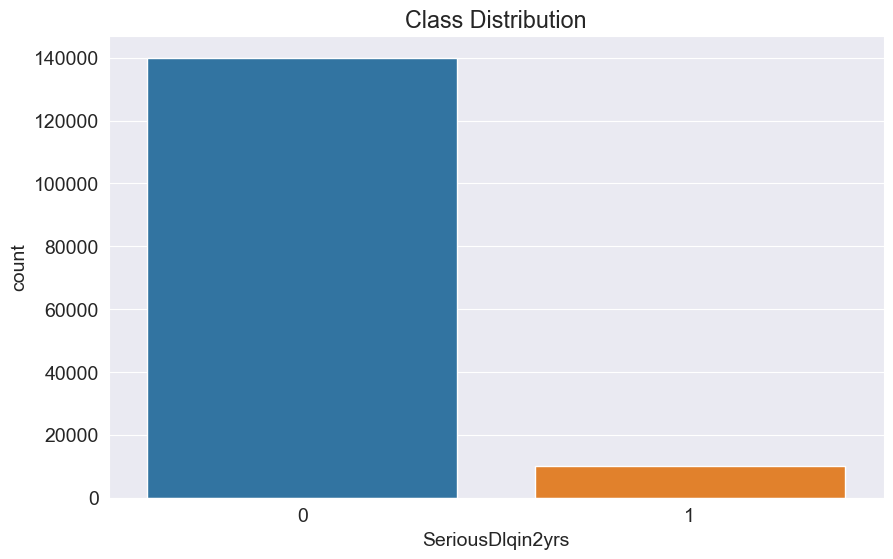

In [80]:
# Countplot
sns.countplot(x='SeriousDlqin2yrs', data=train)
plt.title('Class Distribution')
plt.show()

Les données sont fortement déséquilibrés en faveur de la classe des individus qui n'ont pas de défaut de paiement. Non corrigé, ce deséquilibre affectera negativement la qualité des prédictions des modèle que nous utiliserons.

#### Réequilibrage des classes

Procédons au rééchantillonnages des individus qui ne présentent pas de défaut de paiement. Nous tirerons parmi ceux-ci un échantillons d'individu de sortes que les personnes en défaut de paiement représentent 40% de la base.

Ainsi, le nombre d'indivu qui ne présentent pas un défaut de paiement et qui doivent être tiré est $n = \fract{train.shape[0]*40}{100}$

In [149]:
#Calcul de la taille de l'échantillon des sans défaut de paiement à tirer

defaut = train[train["SeriousDlqin2yrs"]==1]

taille_ech = (defaut.shape[0]*100)/40
n = taille_ech - defaut.shape[0]
n

15039.0

In [150]:

## la classe des individus en défaut de paiement
defaut = train[train["SeriousDlqin2yrs"]==1]
#print(defaut.shape[0]/train.shape[0])

## la classe des individus sans défaut de paiement
sans_defaut = train[train["SeriousDlqin2yrs"]==0]
#print(sans_defaut.shape[0]/train.shape[0]) #df.resample 


n = (train.shape[0]*40)/100
sans_defaut_rechant= resample(sans_defaut,replace=False, n_samples = 15039)

sans_defaut_rechant.shape[0]
#defaut.shape[0]

15039

# Modélisation

Dans cette partie, nous implémenterons plusieurs modèles que nous évaluerons afin de sélectionner le meilleur. Les modèles que nous utiliserons sont : 
- logist_regressor : modèle de regression logistique
- RandomForest
- XGClassifier
- LGBClassifier


- Subdivisons les données d'entrainement en données de train et données de test

In [151]:
# Reconstitution de la base de travail équilibré
base_equil = pd.concat([defaut,sans_defaut_rechant],axis=0)
#defaut2 = sans_defaut_rechant[sans_defaut_rechant["SeriousDlqin2yrs"]==1]
sans_defaut2 = base_equil[base_equil["SeriousDlqin2yrs"]==0]

print("la proportion d'individus ne présentant pas un defaut de paiement est :", sans_defaut2.shape[0]/base_equil.shape[0])


#Redéfinition des features et de la variable cible
### target
y = base_equil["SeriousDlqin2yrs"]

## Variables explicatives
x = base_equil.drop("SeriousDlqin2yrs", axis=1)

## Subdivision en train et en test



la proportion d'individus ne présentant pas un defaut de paiement est : 0.6


## Subdivision en train et en test

In [152]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=0,stratify=y)

## Création des données de validation

In [153]:
x_val,x_test,y_val,y_test=train_test_split(x_test,y_test,test_size=0.5,random_state=0,stratify=y_test)

# Modèle 1 : Regression Logistique

In [208]:
modele1= Pipeline(steps=[("scaler",RobustScaler()), ("logist_regressor", LogisticRegression(solver='saga',max_iter = 200,random_state=0 ))])

In [209]:
modele1.fit(x_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()),
                ('logist_regressor',
                 LogisticRegression(max_iter=200, random_state=0,
                                    solver='saga'))])

In [211]:
def testemodel(model):
    y_pred=model.predict(x_val)
    target_name=["non_defaut_paiement","defaut_paiement"]
    print("la matrice de confusion:\n")
    print(confusion_matrix(y_val,y_pred,normalize="all")*100)
    print("le rapport de classification:\n")
    print(classification_report(y_val,y_pred,target_names=target_name))
    ConfusionMatrixDisplay.from_predictions(y_val,y_pred)

la matrice de confusion:

[[56.06544294  3.95051875]
 [21.54828412 18.43575419]]
le rapport de classification:

                     precision    recall  f1-score   support

non_defaut_paiement       0.72      0.93      0.81      1504
    defaut_paiement       0.82      0.46      0.59      1002

           accuracy                           0.75      2506
          macro avg       0.77      0.70      0.70      2506
       weighted avg       0.76      0.75      0.73      2506



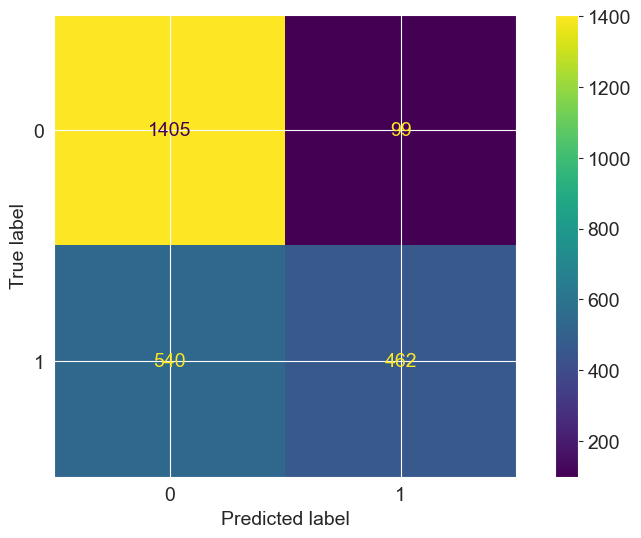

In [157]:
testemodel(modele1)

#### Commentaire des performances du modèle Logistique
La métrique que nous commenterons principalement est l'accuracy.
L'accuracy est la proportion de prédictions correctes faites par le modèle par rapport au nombre total d'échantillons de données.
Elle est calculée en divisant le nombre de prédictions correctes (vrais positifs et vrais négatifs) par le nombre total d'échantillons dans le jeu de données :
Accuracy = (Vrais positifs + Vrais négatifs) / (Nombre total d'échantillons)
L'accuracy du modèle logistique est de 0,75. Cela indique le taux de bonne prédiction est de 75%. En d'autres termes il ya 75% de chance qu'un individu soit correctement classé. Cette performance est assez satifaisante. 
Par ailleurs le recall pour l'échantillon des personnes en sans défaut de paiement est de 0,94. Cela signifie que le modèle classe correctement 94% des individus de la classe des non pauvres.
Enfin, le recall (sensivity) des individu en défaut de paiement de 0,46 indique qu'il ya 46% de chance qu'un individu en défaut de paiement soit effectivelent classé parmis les individus en défaut de paiement.  

# Modèle 2 : RandomForest

In [280]:
from sklearn.impute import SimpleImputer,KNNImputer
model2 = Pipeline(steps=[("imput_num",SimpleImputer(strategy="median")), ("scaler",RobustScaler()), ("Random_forest", RandomForestClassifier(random_state=0))])


In [213]:
model2.fit(x_train, y_train)

Pipeline(steps=[('imput_num', SimpleImputer(strategy='median')),
                ('scaler', RobustScaler()),
                ('Random_forest', RandomForestClassifier(random_state=0))])

la matrice de confusion:

[[51.15722267  8.85873903]
 [12.49002394 27.49401437]]
le rapport de classification:

                     precision    recall  f1-score   support

non_defaut_paiement       0.80      0.85      0.83      1504
    defaut_paiement       0.76      0.69      0.72      1002

           accuracy                           0.79      2506
          macro avg       0.78      0.77      0.77      2506
       weighted avg       0.78      0.79      0.78      2506



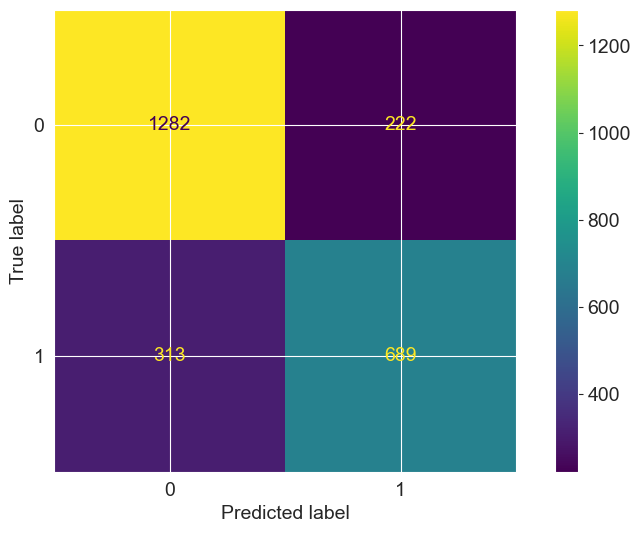

In [214]:
testemodel(model2)

 L'accuracy du modèle de RandomForest est de 0,79. Cela indique le taux de bonne prédiction est de 79%. En d'autres termes, il y a 79% de chance qu'un individu soit correctement classé. Cette performance est plus satisfaisante que celle du modèle logistique. Par ailleurs le recall pour l'échantillon des personnes sans défaut de paiement est de 0,85. Cela signifie que le modèle classe correctement 85% des individus de la classe des non pauvres. Enfin, le recall (sensitivity) des individus en défaut de paiement de 0,65 indique qu'il y a 65% de chance qu'un individu en défaut de paiement soit effectivelent classé parmis les individus en défaut de paiement.

# XGBoost 

In [215]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Creating the DMatrix for XGBoost
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

# Defining the parameters for XGBoost
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.1,
    'max_depth': 3,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# Entrainement du model
num_rounds = 100
model3 = xgb.train(params, dtrain, num_rounds)

# Prédiction sur les données de test
y_pred = model3.predict(dtest)
predictions = [round(value) for value in y_pred]

# Evaluation de l'accuracy 
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 79.70%


L'accuracy du modèle de XGBoost est de 0,797. Cela indique qu'il ya 79,7% de chance qu'un individu soit correctement classé. Cette performance est plus satisfaisante que celle du modèle logistique et du RandomForest.

## Choix du meilleur modele :

Le critère de sélection du meilleur modèle que nous avons opté est l'accuracy. Ce choix, nous le justifions par le fait que cette métrique est celle qui mésure la performance globale du modèle, sa capacité a classer correctement à la fois les personnes qui présentent un défaut de paiement et les personnes solvables.

Le tableau ci-dessous resume les accuracy des différents modèles :

| Nom du modèle                        | Acurracy                                                                                                                                                  | Pourcentage       |
|--------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------|------------|
| Logistique Regression                    | 0,75                                                    | 75%        |
| RandomForest | 0,79 | 79% |
| XGBoost | 0,797 | 79,7% |


Au regard du tableau des performances des 3 modèles ci-dessus il ressort que le meilleur modèle est le XGBoost. Nous utiliserons donc ce modèle pour proceder à la prédiction.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification

# Prédiction & Choix du seuil de classification : A partir de la base d'entrainement

Dans cette partie nous procedons à la prédiction à partir de notre meilleur modèle qui est le XGBoost. Nous utilisons ici les données de test de la base d'entrainement.   

In [357]:
#Importation des données de test

donne_test = pd.read_csv("C:/Users/LENOVO/Documents/ISE2/Machine learning/Machine Learning 2/Projet/Projet_ML2 partagé/Notebook/test.csv")


donne_test.drop("SeriousDlqin2yrs", axis=1, inplace=True)
donne_test.drop("Unnamed: 0", axis=1, inplace=True)


In [358]:
donne_test.columns
for colone in donne_test.columns : 
    donne_test[colone].fillna(donne_test[colone].median(), inplace = True)
    
#target = donne_test["SeriousDlqin2yrs"]
#donne_test.drop("SeriousDlqin2yrs", axis=1, inplace=True)

In [359]:
dtest_inputs = xgb.DMatrix(x_test)

probs=model3.predict(dtest_inputs)
probs

array([0.11821611, 0.64643645, 0.08933868, ..., 0.10245263, 0.91500306,
       0.88298076], dtype=float32)

- Plaçons les probabilités prédites ci-dessus dans un fichier : decision 

In [360]:
decision = pd.read_csv("C:/Users/LENOVO/Documents/ISE2/Machine learning/Machine Learning 2/Projet/Projet_ML2 partagé/Notebook/sampleentry.csv")

decision = decision.iloc[0:2507, :]

decision['Probability'] = probs.tolist()
decision

,Id,Probability
0,1,0.118
1,2,0.646
2,3,0.089
3,4,0.928
4,5,0.956
...,...,...
2502,2503,0.192
2503,2504,0.704
2504,2505,0.102
2505,2506,0.915


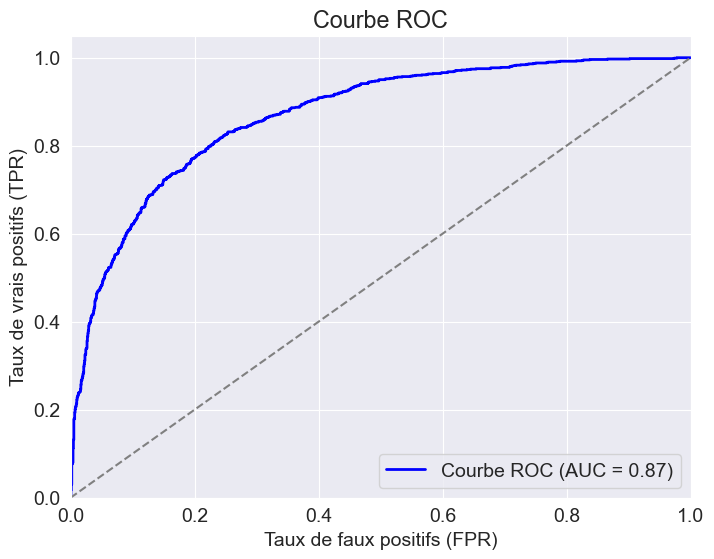

In [361]:
# Prédire les probabilités des classes positives (classe 1)
#y_prob = model.predict_proba(X_test)[:, 1]
y_prob = decision['Probability']

# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculer l'aire sous la courbe ROC (AUC)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

La courbe ROC (Receiver Operating Characteristic) est un outil graphique largement utilisé pour évaluer la performance des modèles de classification binaires. Elle représente le taux de vrais positifs (True Positive Rate, TPR) en fonction du taux de faux positifs (False Positive Rate, FPR) à différents seuils de classification. 

La surface de la courbe de ROC ci-dessus est de 0,87. Cela indique que si nous sélectionnons un individu de facon aléatoire, il y a 85% de chance que celui-ci soit bien classé.    

### Choix du seuil de classement des individus selon le defaut de paiement ou non

Nous utilerons la courbe de ROC pour le choix du seuil à partir duquel les iindividu seront considérée comme étant en défaut de paiement.

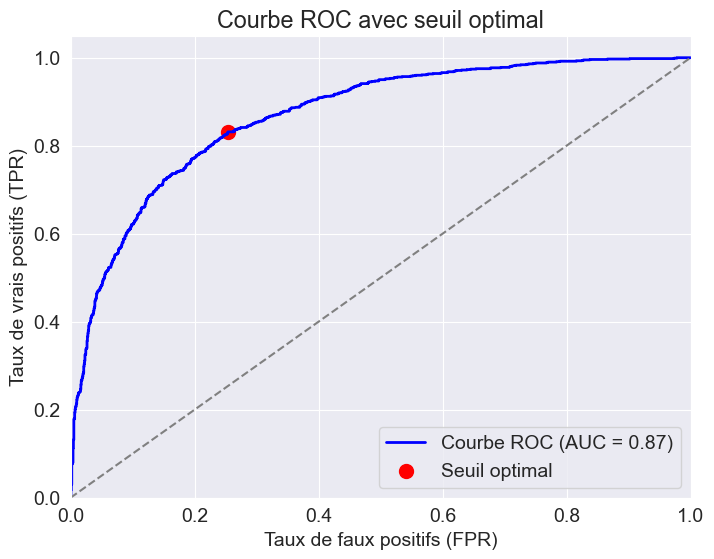

Seuil optimal: 0.33842548727989197


In [362]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score


# Prédire les probabilités des classes positives (classe 1)
y_prob = decision['Probability']
#y_prob = np.array(decision['Probability'])


# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculer l'aire sous la courbe ROC (AUC)
roc_auc = roc_auc_score(y_test, y_prob)

# Trouver l'index du seuil le plus proche du coin supérieur gauche [0, 1]
idx = np.argmax(tpr - fpr)

# Seuil de classement optimal
optimal_threshold = thresholds[idx]

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.scatter(fpr[idx], tpr[idx], color='red', marker='o', s=100, label='Seuil optimal')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC avec seuil optimal')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print("Seuil optimal:", optimal_threshold)

Ce code effectue une régression logistique pour classifier des données synthétiques en deux classes (0 ou 1) et calcule la courbe ROC pour évaluer les performances du modèle. La finalité du code est de trouver le seuil de classement optimal qui maximise le taux de vrais positifs (sensibilité) tout en minimisant le taux de faux positifs. Ce seuil permettra de prendre des décisions équilibrées entre sensibilité et spécificité du modèle.

Le choix du seuil est effectué en trouvant l'indice du point le plus proche du coin supérieur gauche (coordonnées [0, 1]) de la courbe ROC. Cela correspond au seuil où le taux de vrais positifs est élevé et le taux de faux positifs est bas. Une fois que l'indice du seuil optimal est identifié, le seuil de classement associé est extrait et affiché. Ce seuil permettra de classer les prédictions de manière à maximiser la performance globale du modèle en fonction des spécifications choisies par l'utilisateur.

# Prédiction sur les données de la base de test

Nous procedons dans cette partie finale à la prédiction sur les données de la base de test. 

In [363]:
dtest_inputs = xgb.DMatrix(donne_test)

probs=model3.predict(dtest_inputs)
probs

decision = pd.read_csv("C:/Users/LENOVO/Documents/ISE2/Machine learning/Machine Learning 2/Projet/Projet_ML2 partagé/Notebook/sampleentry.csv")

#decision = decision.iloc[0:2507, :]

decision['Probability'] = probs.tolist()
decision

,Id,Probability
0,1,0.417
1,2,0.339
2,3,0.101
3,4,0.456
4,5,0.457
...,...,...
101498,101499,0.219
101499,101500,0.803
101500,101501,0.048
101501,101502,0.524


In [364]:
# Fonction pour définir la valeur de la colonne 'decision' en fonction de 'Probability'
def make_decision(probability):
    if probability < 0.33:
        return "Crédit accordé"
    else:
        return "Crédit non accordé"

# Appliquer la fonction make_decision à la colonne 'Probability' pour créer la colonne 'decision'
decision['decision'] = decision['Probability'].apply(make_decision)

In [365]:
decision

,Id,Probability,decision
0,1,0.417,Crédit non accordé
1,2,0.339,Crédit non accordé
2,3,0.101,Crédit accordé
3,4,0.456,Crédit non accordé
4,5,0.457,Crédit non accordé
...,...,...,...
101498,101499,0.219,Crédit accordé
101499,101500,0.803,Crédit non accordé
101500,101501,0.048,Crédit accordé
101501,101502,0.524,Crédit non accordé


In [332]:
# Exportons les probabilités prédites dans un fichier csv
decision.to_csv('decision.csv',index=False)

In [370]:
#Enregistrons les classements effectué des individus dans la base test : nous nommerons celle ci : prdiction_sur_test.csv
def make_decision2(probability):
    if probability < 0.33:
        return 0
    else:
        return 1

donne_test['Probability'] = probs.tolist()
donne_test["SeriousDlqin2yrs"] = decision['Probability'].apply(make_decision2)
donne_test['decision'] = decision['Probability'].apply(make_decision)

In [371]:
donne_test.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Probability,SeriousDlqin2yrs,decision
0,0.886,43,0,0.178,5700.000,4,0,0,0,0.000,0.417,1,Crédit non accordé
1,0.463,57,0,0.527,9141.000,15,0,4,0,2.000,0.339,1,Crédit non accordé
2,0.043,59,0,0.688,5083.000,12,0,1,0,2.000,0.101,0,Crédit accordé
3,0.280,38,1,0.926,3200.000,7,0,2,0,0.000,0.456,1,Crédit non accordé
4,1.000,27,0,0.020,3865.000,4,0,0,0,1.000,0.457,1,Crédit non accordé


In [372]:
# Exportons les prédiction des individus de la base de test dans un fichier csv que nous avons nommé : prediction_sur_test.csv
donne_test.to_csv('prediction_sur_test.csv',index=False)

In [373]:
!pip install joblib

In [374]:
import joblib
# Enregistrement du modèle au format pickle
filename = 'modele_scoring_credit.pkl'
joblib.dump(model3, filename)

['modele_scoring_credit.pkl']